# Выпускная квалификационная работа Карпова Филиппа Алексеевича

слушателя курса "Data Science" Образовательного центра Московского государственного технического университета им. Н.Э. Баумана


Тема исследования: Прогнозирование конечных свойств новых материалов (композиционных материалов).

## Импорт библиотек

In [96]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
import seaborn as sns
import plotly.express as px
import tensorflow as tf
import sklearn

from matplotlib import colormaps
from sklearn import linear_model
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.linear_model import LinearRegression, LogisticRegression, SGDRegressor
from sklearn import metrics
from sklearn.metrics import accuracy_score, mean_squared_error, r2_score, mean_absolute_percentage_error, mean_absolute_error
from sklearn.model_selection import train_test_split, GridSearchCV, KFold, cross_val_score
from sklearn.neighbors import KNeighborsRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.pipeline import make_pipeline, Pipeline
from sklearn import preprocessing
from sklearn.preprocessing import Normalizer, LabelEncoder, MinMaxScaler, StandardScaler
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor

from tensorflow import keras as keras
from tensorflow.keras import layers
from tensorflow.keras.layers import Dense, Flatten, Dropout, BatchNormalization, Activation
from pandas import read_excel, DataFrame, Series
from scikeras.wrappers import KerasClassifier, KerasRegressor
from tensorflow.keras.models import Sequential
from numpy.random import seed
from scipy import stats
import warnings
from tabulate import tabulate
warnings.filterwarnings("ignore")
from joblib import dump, load                           # для сохранения и загрузки моделей 
from tensorflow.keras.models import load_model
import os

## Загрузка Датасета

In [2]:
# Путь к excel-файлам с датасетами
data_path = '../datasets/'

### Первый Датасет X_bp.xlsx

In [3]:
df_bp = pd.read_excel(data_path + 'X_bp.xlsx', index_col=0)
df_bp.shape
print(df_bp.shape)
df_bp.head()


(1023, 10)


Соотношение матрица-наполнитель  Плотность, кг/м3  модуль упругости, ГПа  \
0                         1.857143            2030.0             738.736842   
1                         1.857143            2030.0             738.736842   
2                         1.857143            2030.0             738.736842   
3                         1.857143            2030.0             738.736842   
4                         2.771331            2030.0             753.000000   

   Количество отвердителя, м.%  Содержание эпоксидных групп,%_2  \
0                        30.00                        22.267857   
1                        50.00                        23.750000   
2                        49.90                        33.000000   
3                       129.00                        21.250000   
4                       111.86                        22.267857   

   Температура вспышки, С_2  Поверхностная плотность, г/м2  \
0                100.000000                          210.0   
1                284.615385                          210.0   
2                284.615385                          210.0   
3                300.000000                          210.0   
4                284.615385                          210.0   

   Модуль упругости при растяжении, ГПа  Прочность при растяжении, МПа  \
0                                  70.0                         3000.0   
1                                  70.0                         3000.0   
2                                  70.0                         3000.0   
3                                  70.0                         3000.0   
4                                  70.0                         3000.0   

   Потребление смолы, г/м2  
0                    220.0  
1                    220.0  
2                    220.0  
3                    220.0  
4                    220.0

1023 объекта, 10 признаков, 2 признака - целевые.

### Второй Датасет X_nup.xlsx

In [4]:
df_nup = pd.read_excel(data_path + 'X_nup.xlsx', index_col=0)
df_nup.shape
print(df_nup.shape)
df_nup.head()

(1040, 3)


Угол нашивки, град  Шаг нашивки  Плотность нашивки
0                   0          4.0               57.0
1                   0          4.0               60.0
2                   0          4.0               70.0
3                   0          5.0               47.0
4                   0          5.0               57.0

1040 объектов, 3 признака.

### Объединение Датасетов

In [5]:
df = df_bp.merge(df_nup, left_index = True, right_index = True, how = 'inner')
print(df.shape)
df.head()

(1023, 13)


Соотношение матрица-наполнитель  Плотность, кг/м3  модуль упругости, ГПа  \
0                         1.857143            2030.0             738.736842   
1                         1.857143            2030.0             738.736842   
2                         1.857143            2030.0             738.736842   
3                         1.857143            2030.0             738.736842   
4                         2.771331            2030.0             753.000000   

   Количество отвердителя, м.%  Содержание эпоксидных групп,%_2  \
0                        30.00                        22.267857   
1                        50.00                        23.750000   
2                        49.90                        33.000000   
3                       129.00                        21.250000   
4                       111.86                        22.267857   

   Температура вспышки, С_2  Поверхностная плотность, г/м2  \
0                100.000000                          210.0   
1                284.615385                          210.0   
2                284.615385                          210.0   
3                300.000000                          210.0   
4                284.615385                          210.0   

   Модуль упругости при растяжении, ГПа  Прочность при растяжении, МПа  \
0                                  70.0                         3000.0   
1                                  70.0                         3000.0   
2                                  70.0                         3000.0   
3                                  70.0                         3000.0   
4                                  70.0                         3000.0   

   Потребление смолы, г/м2  Угол нашивки, град  Шаг нашивки  Плотность нашивки  
0                    220.0                   0          4.0               57.0  
1                    220.0                   0          4.0               60.0  
2                    220.0                   0          4.0               70.0  
3                    220.0                   0          5.0               47.0  
4                    220.0                   0          5.0               57.0

После объединения: 1023 объекта, 13 признаков, 2 признака - целевые.

## Исследование данных

### Исходный датасет 

In [6]:
# Исхоный датасет
df

Соотношение матрица-наполнитель  Плотность, кг/м3  \
0                            1.857143       2030.000000   
1                            1.857143       2030.000000   
2                            1.857143       2030.000000   
3                            1.857143       2030.000000   
4                            2.771331       2030.000000   
...                               ...               ...   
1018                         2.271346       1952.087902   
1019                         3.444022       2050.089171   
1020                         3.280604       1972.372865   
1021                         3.705351       2066.799773   
1022                         3.808020       1890.413468   

      модуль упругости, ГПа  Количество отвердителя, м.%  \
0                738.736842                    30.000000   
1                738.736842                    50.000000   
2                738.736842                    49.900000   
3                738.736842                   129.000000   
4                753.000000                   111.860000   
...                     ...                          ...   
1018             912.855545                    86.992183   
1019             444.732634                   145.981978   
1020             416.836524                   110.533477   
1021             741.475517                   141.397963   
1022             417.316232                   129.183416   

      Содержание эпоксидных групп,%_2  Температура вспышки, С_2  \
0                           22.267857                100.000000   
1                           23.750000                284.615385   
2                           33.000000                284.615385   
3                           21.250000                300.000000   
4                           22.267857                284.615385   
...                               ...                       ...   
1018                        20.123249                324.774576   
1019                        19.599769                254.215401   
1020                        23.957502                248.423047   
1021                        19.246945                275.779840   
1022                        27.474763                300.952708   

      Поверхностная плотность, г/м2  Модуль упругости при растяжении, ГПа  \
0                        210.000000                             70.000000   
1                        210.000000                             70.000000   
2                        210.000000                             70.000000   
3                        210.000000                             70.000000   
4                        210.000000                             70.000000   
...                             ...                                   ...   
1018                     209.198700                             73.090961   
1019                     350.660830                             72.920827   
1020                     740.142791                             74.734344   
1021                     641.468152                             74.042708   
1022                     758.747882                             74.309704   

      Прочность при растяжении, МПа  Потребление смолы, г/м2  \
0                       3000.000000               220.000000   
1                       3000.000000               220.000000   
2                       3000.000000               220.000000   
3                       3000.000000               220.000000   
4                       3000.000000               220.000000   
...                             ...                      ...   
1018                    2387.292495               125.007669   
1019                    2360.392784               117.730099   
1020                    2662.906040               236.606764   
1021                    2071.715856               197.126067   
1022                    2856.328932               194.754342   

      Угол нашивки, град  Шаг нашивки  Плотность нашивки  
0                 

### Информация о датасете (пропуски, дубликаты, типы данных)

##### Типы данных и пропуски

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1023 entries, 0 to 1022
Data columns (total 13 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Соотношение матрица-наполнитель       1023 non-null   float64
 1   Плотность, кг/м3                      1023 non-null   float64
 2   модуль упругости, ГПа                 1023 non-null   float64
 3   Количество отвердителя, м.%           1023 non-null   float64
 4   Содержание эпоксидных групп,%_2       1023 non-null   float64
 5   Температура вспышки, С_2              1023 non-null   float64
 6   Поверхностная плотность, г/м2         1023 non-null   float64
 7   Модуль упругости при растяжении, ГПа  1023 non-null   float64
 8   Прочность при растяжении, МПа         1023 non-null   float64
 9   Потребление смолы, г/м2               1023 non-null   float64
 10  Угол нашивки, град                    1023 non-null   int64  
 11  Шаг нашивки           

Все переменные - числовые, пропуски и нулевые значения отсутствуют

##### Уникальные значения и дупликаты

In [8]:
df.nunique()

Соотношение матрица-наполнитель         1014
Плотность, кг/м3                        1013
модуль упругости, ГПа                   1020
Количество отвердителя, м.%             1005
Содержание эпоксидных групп,%_2         1004
Температура вспышки, С_2                1003
Поверхностная плотность, г/м2           1004
Модуль упругости при растяжении, ГПа    1004
Прочность при растяжении, МПа           1004
Потребление смолы, г/м2                 1003
Угол нашивки, град                         2
Шаг нашивки                              989
Плотность нашивки                        988
dtype: int64

In [9]:
#Проверяем данные на наличие дубликатов
df.duplicated().sum()

0

Все параметры (за исключением Угла нашивки) в основном уникальны. Дубликаты отсутствуют

### Описательная статистика исходного датасета

##### Статистические характеристики датасета

In [10]:
#Смотрим описательную статистику:
#count - количество значений
#mean - среднее значение
#std - стандартное отклонение
#min - минимум
#25% - верхнее значение первого квартиля
#50% - медиана
#75% - верхнее значение третьего квартиля
#max - максимум
df.describe().T

count         mean         std  \
Соотношение матрица-наполнитель       1023.0     2.930366    0.913222   
Плотность, кг/м3                      1023.0  1975.734888   73.729231   
модуль упругости, ГПа                 1023.0   739.923233  330.231581   
Количество отвердителя, м.%           1023.0   110.570769   28.295911   
Содержание эпоксидных групп,%_2       1023.0    22.244390    2.406301   
Температура вспышки, С_2              1023.0   285.882151   40.943260   
Поверхностная плотность, г/м2         1023.0   482.731833  281.314690   
Модуль упругости при растяжении, ГПа  1023.0    73.328571    3.118983   
Прочность при растяжении, МПа         1023.0  2466.922843  485.628006   
Потребление смолы, г/м2               1023.0   218.423144   59.735931   
Угол нашивки, град                    1023.0    44.252199   45.015793   
Шаг нашивки                           1023.0     6.899222    2.563467   
Плотность нашивки                     1023.0    57.153929   12.350969   

                                              min          25%          50%  \
Соотношение матрица-наполнитель          0.389403     2.317887     2.906878   
Плотность, кг/м3                      1731.764635  1924.155467  1977.621657   
модуль упругости, ГПа                    2.436909   500.047452   739.664328   
Количество отвердителя, м.%             17.740275    92.443497   110.564840   
Содержание эпоксидных групп,%_2         14.254985    20.608034    22.230744   
Температура вспышки, С_2               100.000000   259.066528   285.896812   
Поверхностная плотность, г/м2            0.603740   266.816645   451.864365   
Модуль упругости при растяжении, ГПа    64.054061    71.245018    73.268805   
Прочность при растяжении, МПа         1036.856605  2135.850448  2459.524526   
Потребление смолы, г/м2                 33.803026   179.627520   219.198882   
Угол нашивки, град                       0.000000     0.000000     0.000000   
Шаг нашивки                              0.000000     5.080033     6.916144   
Плотность нашивки                        0.000000    49.799212    57.341920   

                                              75%          max  
Соотношение матрица-наполнитель          3.552660     5.591742  
Плотность, кг/м3                      2021.374375  2207.773481  
модуль упругости, ГПа                  961.812526  1911.536477  
Количество отвердителя, м.%            129.730366   198.953207  
Содержание эпоксидных групп,%_2         23.961934    33.000000  
Температура вспышки, С_2               313.002106   413.273418  
Поверхностная плотность, г/м2          693.225017  1399.542362  
Модуль упругости при растяжении, ГПа    75.356612    82.682051  
Прочность при растяжении, МПа         2767.193119  3848.436732  
Потребление смолы, г/м2                257.481724   414.590628  
Угол нашивки, град                      90.000000    90.000000  
Шаг нашивки                              8.586293    14.440522  
Плотность нашивки                       64.944961   103.988901

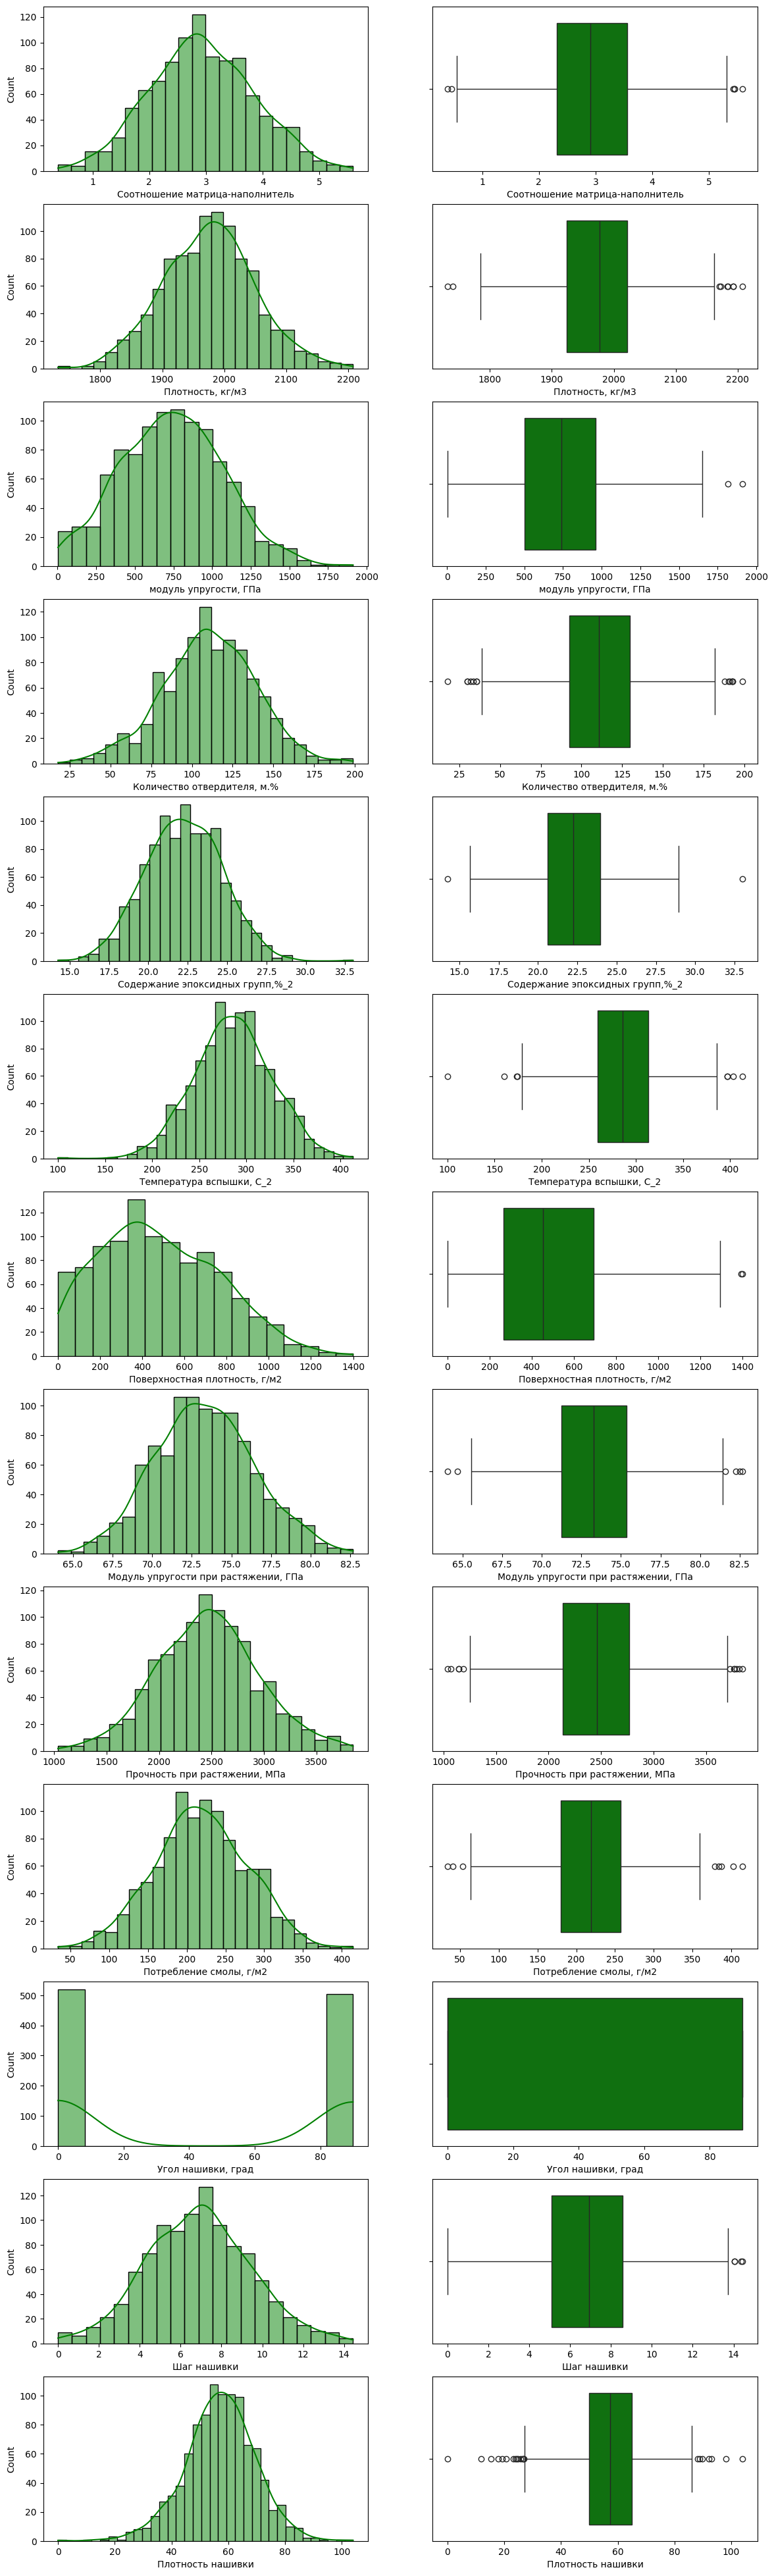

In [11]:
#Построим гистограммы распределения и диаграммы "ящика с усами" для каждого признака
#Сразу оформим построение в процедуру
def show_histplot_boxplot(data_p):
    fig, axes = plt.subplots(13, 2, figsize=(14, 50))
    for k, column in enumerate(data_p.columns):    
        sns.histplot(data=data_p, x=column, kde=True, ax=axes[k, 0], color = "g")
        sns.boxplot(data=data_p, x=column, ax=axes[k, 1], color = "g")
    plt.show()
show_histplot_boxplot(df)

Почти все признаки имеют распределение, близкое к нормальному. Исключение составляет признак "Угол нашивки", имеющий всего 2 значения.
Кроме того видим, что все признаки, кроме "Угла нашивки" имеют выбросы.

##### Взаимная корреляция и попарные графики рассеивания признаков

<function matplotlib.pyplot.show(close=None, block=None)>

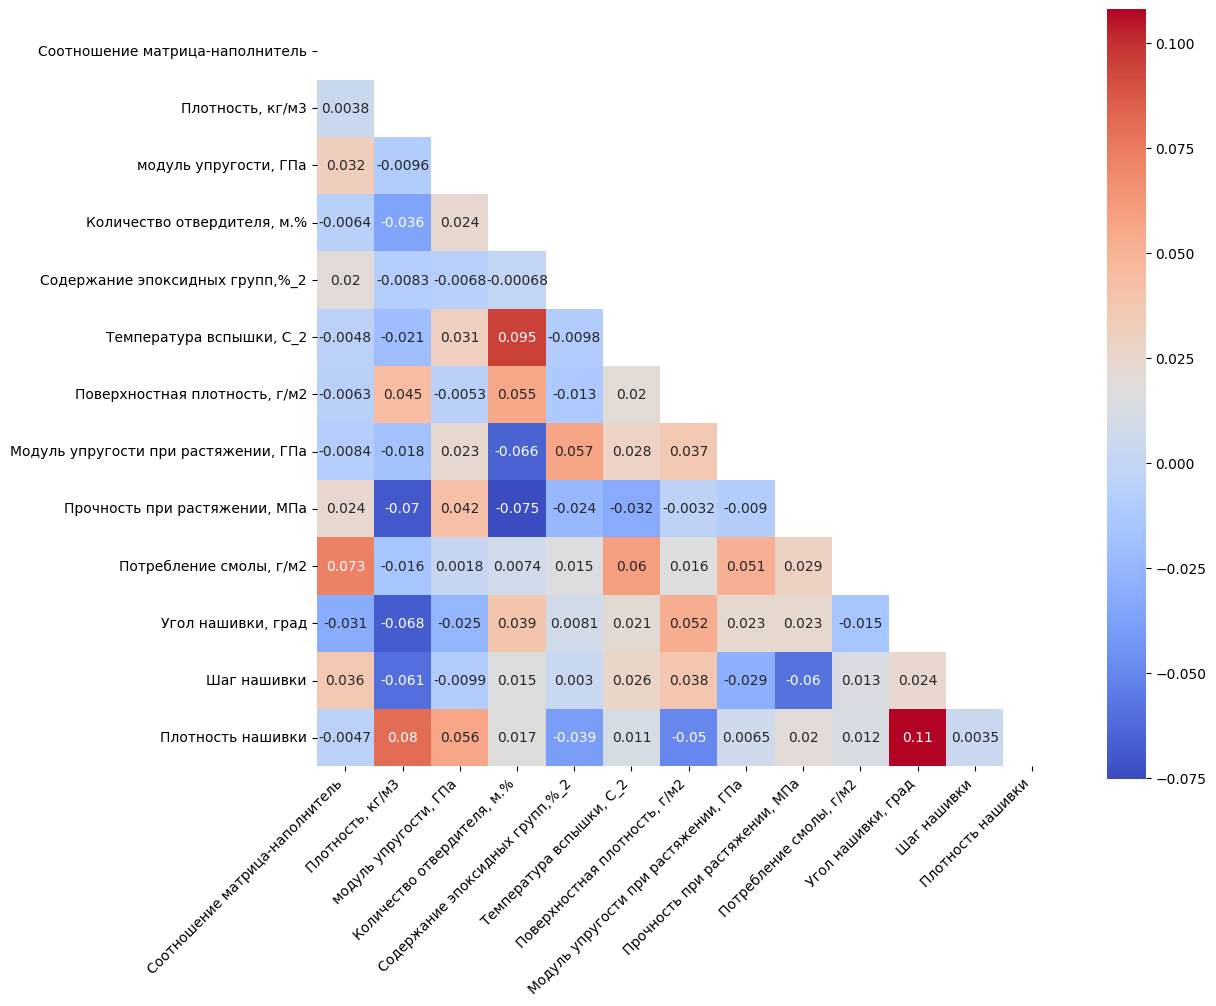

In [12]:
mask = np.triu(df.corr())
f, ax = plt.subplots(figsize = (12, 10))
sns.heatmap(df.corr(), mask = mask, annot = True, square = True, cmap = 'coolwarm')
plt.xticks(rotation = 45, ha='right')
plt.show

В исходном датасете наблюдается слабая взаимная корреляция признаков

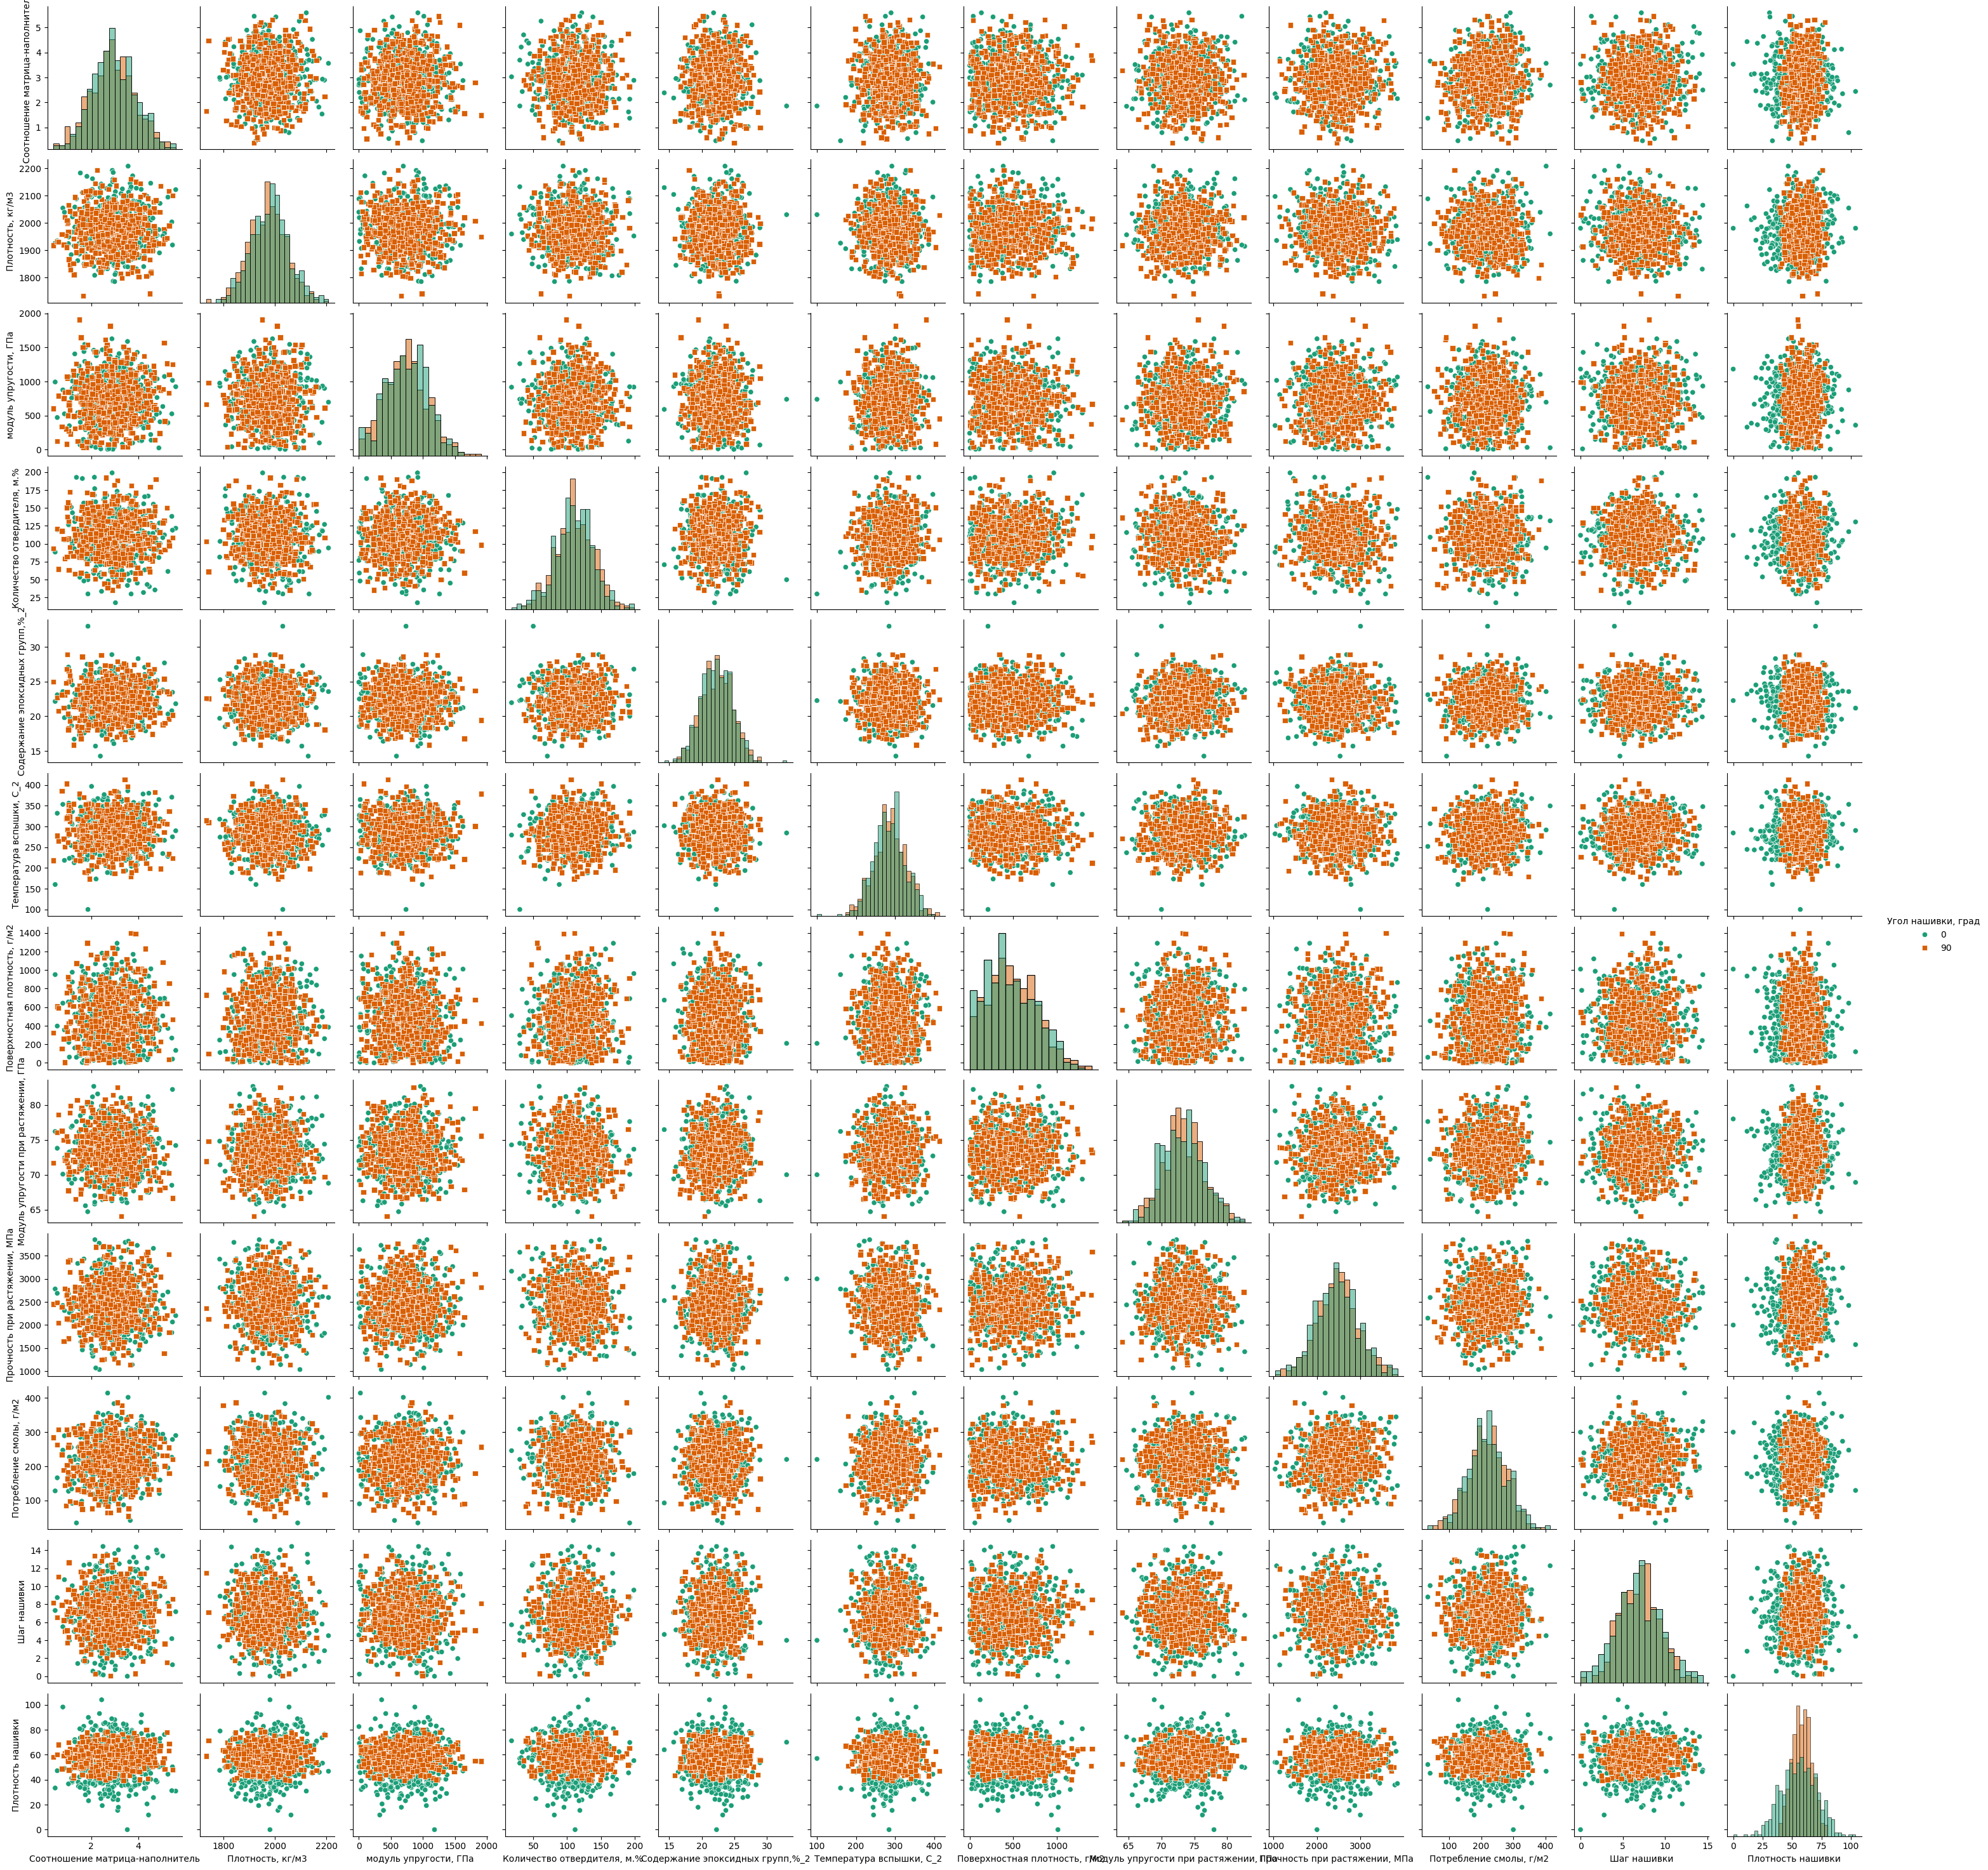

In [13]:
mask = np.triu(df.corr())
sns.pairplot(df, hue = 'Угол нашивки, град', diag_kind="hist",  markers=["o", "s", "D"], palette='Dark2')

Графики показывают:
1) отсутствие линейных зависимостей между признаками;
2) наличие выбросов (об этом говорят достаточно удаленные точки от общего облака точек)

## Предобработка данных

### Удаление выбросов

Преобразуем выбросы в нулевые значения в соответствии с методом межквартильных интервалов

In [14]:
df_no_outliers=df
def outliers_to_null(df):
    for col in df.columns:
        q75,q25 = np.percentile(df.loc[:,col],[75,25])
        intr_qr = q75-q25
        max = q75+(1.5*intr_qr)
        min = q25-(1.5*intr_qr)
        df.loc[df[col] < min,col] = np.nan
        df.loc[df[col] > max,col] = np.nan
outliers_to_null(df_no_outliers)
df_no_outliers.isnull().sum()


Соотношение матрица-наполнитель          6
Плотность, кг/м3                         9
модуль упругости, ГПа                    2
Количество отвердителя, м.%             14
Содержание эпоксидных групп,%_2          2
Температура вспышки, С_2                 8
Поверхностная плотность, г/м2            2
Модуль упругости при растяжении, ГПа     6
Прочность при растяжении, МПа           11
Потребление смолы, г/м2                  8
Угол нашивки, град                       0
Шаг нашивки                              4
Плотность нашивки                       21
dtype: int64

Итерационно удаляем выбросы до тех пор, пока в итоговой выборке их сумма в каждой колонке не окажется 0

In [15]:
while df_no_outliers.isnull().sum().any() > 0:
    outliers_to_null(df_no_outliers)
    df_no_outliers = df_no_outliers.dropna(axis=0)
    outliers_to_null(df_no_outliers)

outliers_to_null(df_no_outliers)
print(df_no_outliers.isnull().sum())


Соотношение матрица-наполнитель         0
Плотность, кг/м3                        0
модуль упругости, ГПа                   0
Количество отвердителя, м.%             0
Содержание эпоксидных групп,%_2         0
Температура вспышки, С_2                0
Поверхностная плотность, г/м2           0
Модуль упругости при растяжении, ГПа    0
Прочность при растяжении, МПа           0
Потребление смолы, г/м2                 0
Угол нашивки, град                      0
Шаг нашивки                             0
Плотность нашивки                       0
dtype: int64


In [16]:
print(df.info())


<class 'pandas.core.frame.DataFrame'>
Index: 1023 entries, 0 to 1022
Data columns (total 13 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Соотношение матрица-наполнитель       1017 non-null   float64
 1   Плотность, кг/м3                      1014 non-null   float64
 2   модуль упругости, ГПа                 1021 non-null   float64
 3   Количество отвердителя, м.%           1009 non-null   float64
 4   Содержание эпоксидных групп,%_2       1021 non-null   float64
 5   Температура вспышки, С_2              1015 non-null   float64
 6   Поверхностная плотность, г/м2         1021 non-null   float64
 7   Модуль упругости при растяжении, ГПа  1017 non-null   float64
 8   Прочность при растяжении, МПа         1012 non-null   float64
 9   Потребление смолы, г/м2               1015 non-null   float64
 10  Угол нашивки, град                    1023 non-null   float64
 11  Шаг нашивки           

In [17]:
df_no_outliers.info()

<class 'pandas.core.frame.DataFrame'>
Index: 922 entries, 1 to 1022
Data columns (total 13 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Соотношение матрица-наполнитель       922 non-null    float64
 1   Плотность, кг/м3                      922 non-null    float64
 2   модуль упругости, ГПа                 922 non-null    float64
 3   Количество отвердителя, м.%           922 non-null    float64
 4   Содержание эпоксидных групп,%_2       922 non-null    float64
 5   Температура вспышки, С_2              922 non-null    float64
 6   Поверхностная плотность, г/м2         922 non-null    float64
 7   Модуль упругости при растяжении, ГПа  922 non-null    float64
 8   Прочность при растяжении, МПа         922 non-null    float64
 9   Потребление смолы, г/м2               922 non-null    float64
 10  Угол нашивки, град                    922 non-null    float64
 11  Шаг нашивки            

После удаления выбросов в датафрейме осталось 922 элемента

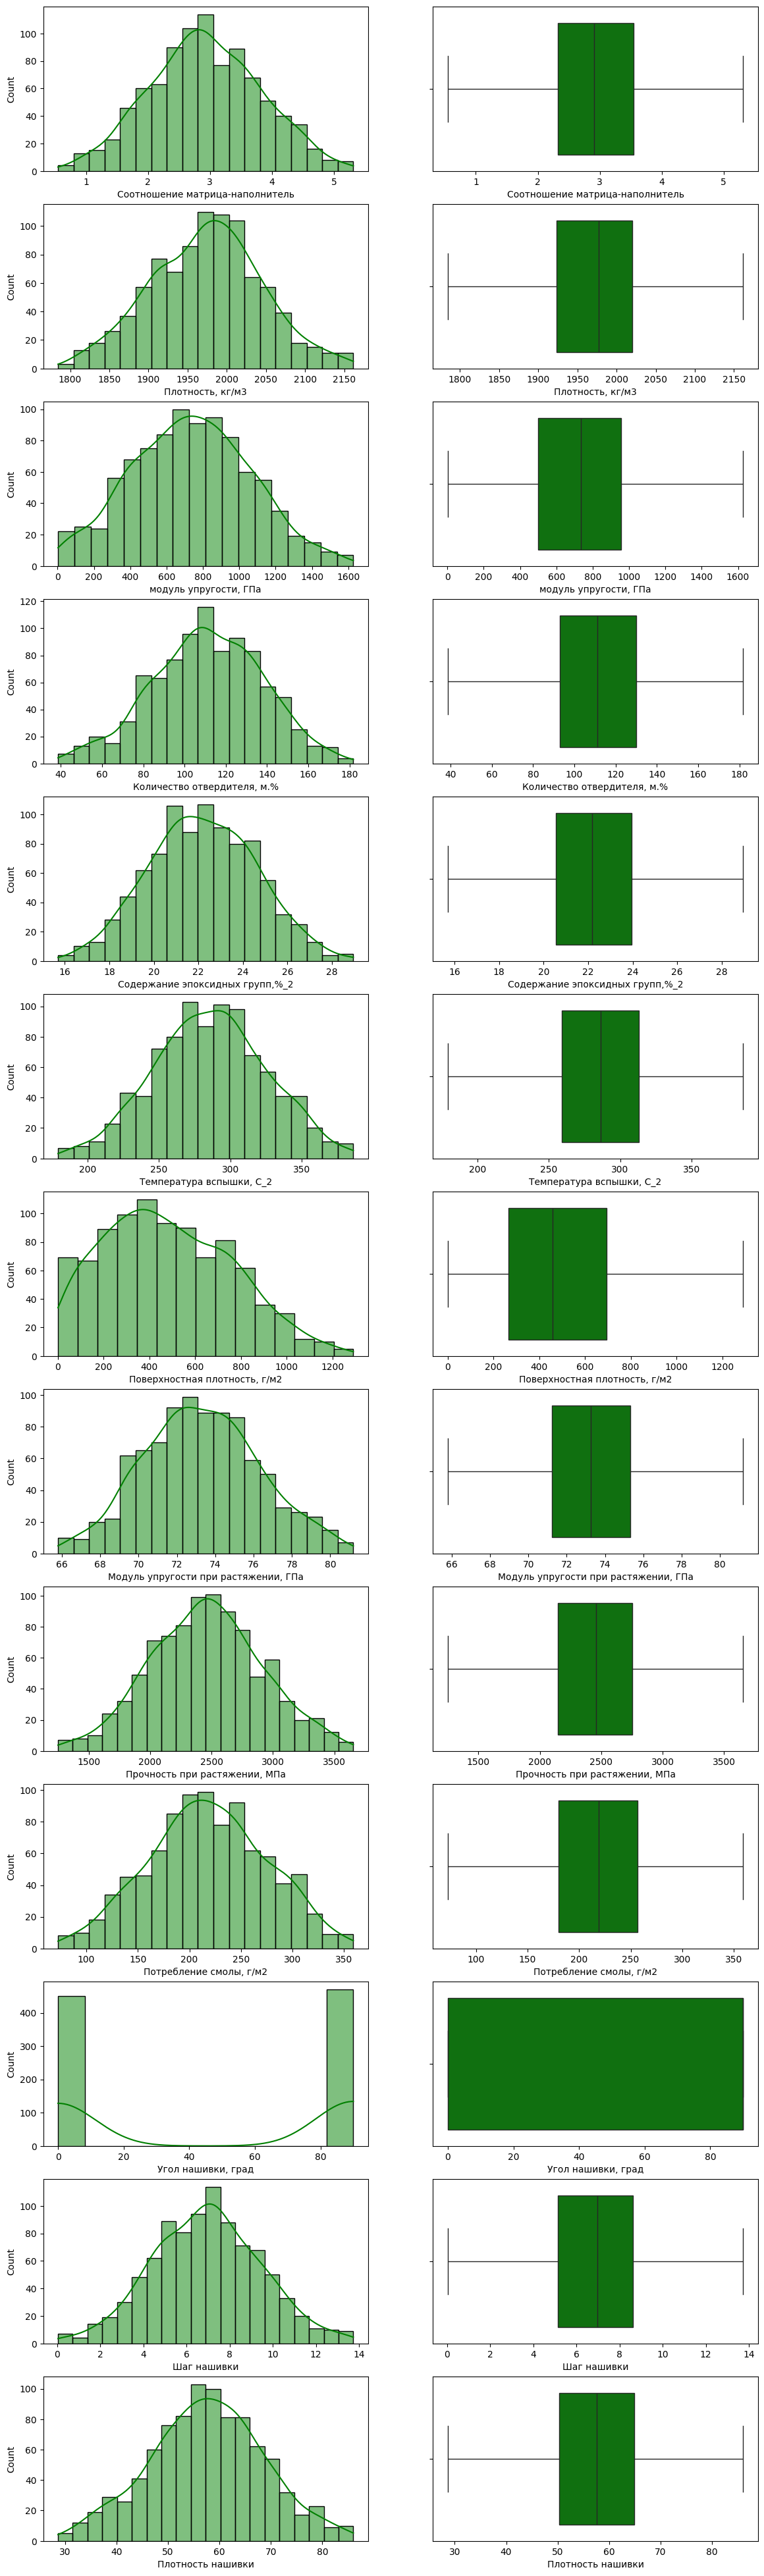

In [18]:
show_histplot_boxplot(df_no_outliers)

Из диаграмм "ящик с усами" видно, что в выборке не осталось выбросов

### Нормализация

In [19]:
min_max_scaler = MinMaxScaler()
df_norm = pd.DataFrame(min_max_scaler.fit_transform(df_no_outliers), columns = df_no_outliers.columns, index=df_no_outliers.index)
df_norm.describe().T

count      mean       std  min  \
Соотношение матрица-наполнитель       922.0  0.499412  0.187858  0.0   
Плотность, кг/м3                      922.0  0.502904  0.188395  0.0   
модуль упругости, ГПа                 922.0  0.451341  0.201534  0.0   
Количество отвердителя, м.%           922.0  0.506200  0.186876  0.0   
Содержание эпоксидных групп,%_2       922.0  0.490578  0.180548  0.0   
Температура вспышки, С_2              922.0  0.516739  0.190721  0.0   
Поверхностная плотность, г/м2         922.0  0.373295  0.217269  0.0   
Модуль упругости при растяжении, ГПа  922.0  0.487343  0.196366  0.0   
Прочность при растяжении, МПа         922.0  0.503776  0.188668  0.0   
Потребление смолы, г/м2               922.0  0.507876  0.199418  0.0   
Угол нашивки, град                    922.0  0.510846  0.500154  0.0   
Шаг нашивки                           922.0  0.503426  0.183587  0.0   
Плотность нашивки                     922.0  0.503938  0.193933  0.0   

                                           25%       50%       75%  max  
Соотношение матрица-наполнитель       0.371909  0.495189  0.629774  1.0  
Плотность, кг/м3                      0.368184  0.511396  0.624719  1.0  
модуль упругости, ГПа                 0.305188  0.451377  0.587193  1.0  
Количество отвердителя, м.%           0.378514  0.506382  0.638735  1.0  
Содержание эпоксидных групп,%_2       0.366571  0.488852  0.623046  1.0  
Температура вспышки, С_2              0.386228  0.516931  0.646553  1.0  
Поверхностная плотность, г/м2         0.204335  0.354161  0.538397  1.0  
Модуль упругости при растяжении, ГПа  0.353512  0.483718  0.617568  1.0  
Прочность при растяжении, МПа         0.373447  0.501481  0.624299  1.0  
Потребление смолы, г/м2               0.374647  0.510143  0.642511  1.0  
Угол нашивки, град                    0.000000  1.000000  1.000000  1.0  
Шаг нашивки                           0.372844  0.506414  0.626112  1.0  
Плотность нашивки                     0.376869  0.504310  0.630842  1.0

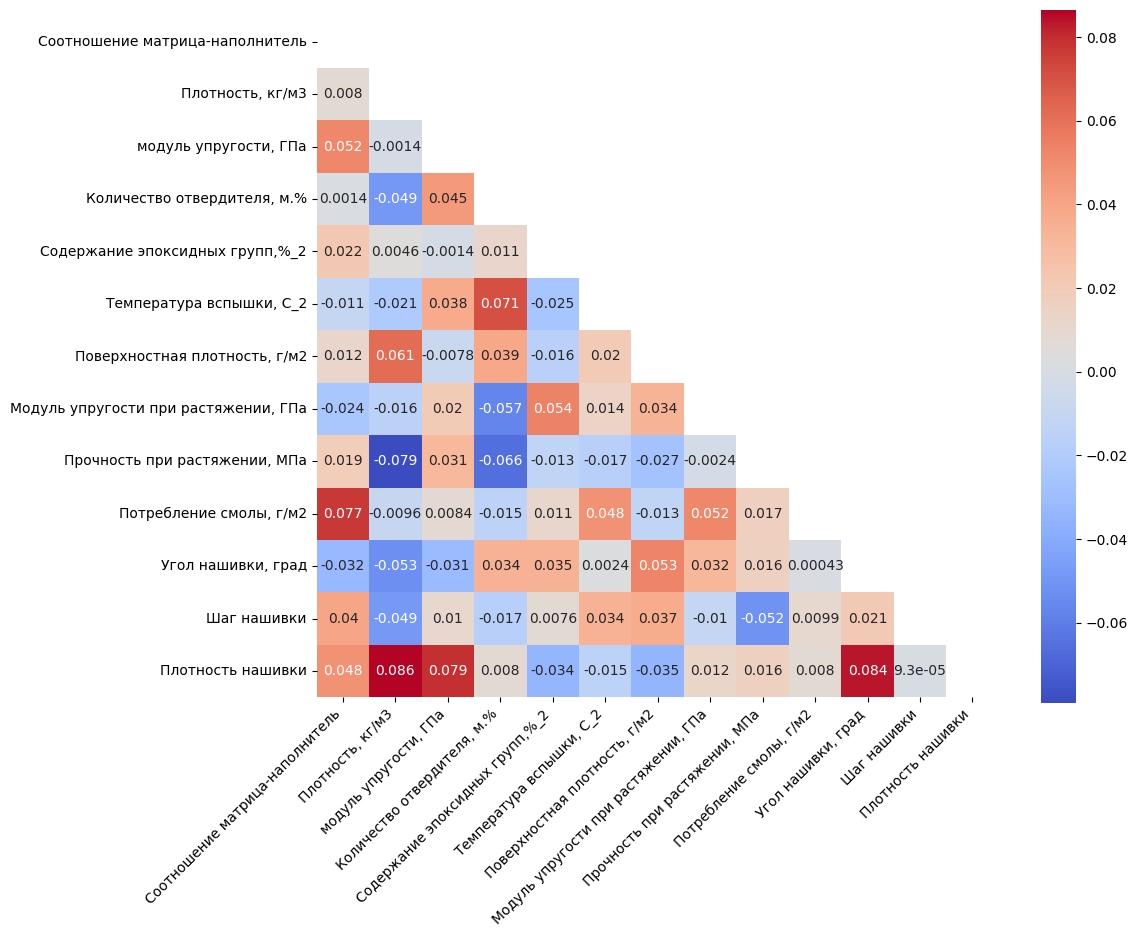

In [20]:
mask = np.triu(df_norm.corr())
f, ax = plt.subplots(figsize=(11, 9))
sns.heatmap(df_norm.corr(), mask=mask, annot=True, square=True, cmap='coolwarm')
plt.xticks(rotation=45, ha='right')
plt.show()

### Стандартизация

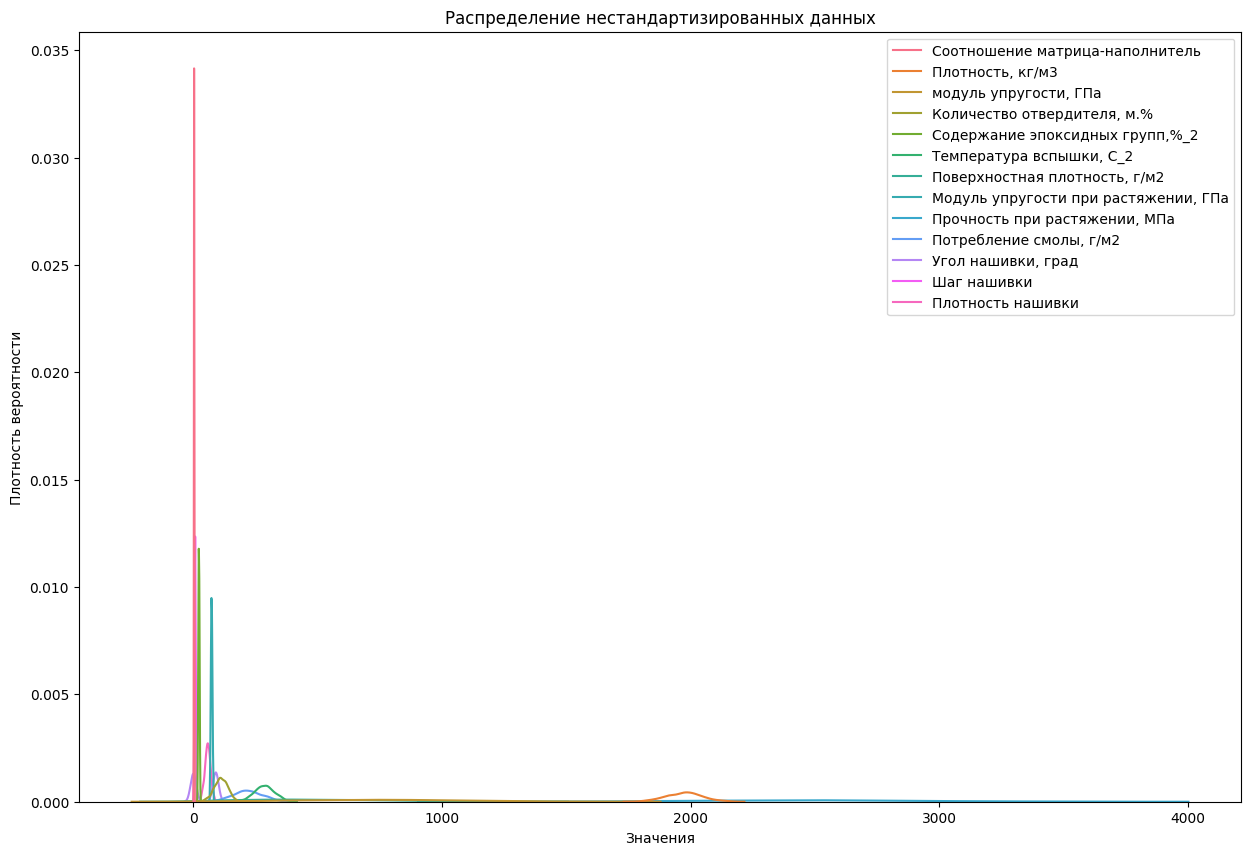

In [21]:
fig, ax = plt.subplots(figsize = (15, 10))
sns.kdeplot(df_no_outliers, shade=False, color='b', label='Нестандартизированные данные')
plt.title('Распределение нестандартизированных данных')
plt.xlabel('Значения')
plt.ylabel('Плотность вероятности')
plt.show()

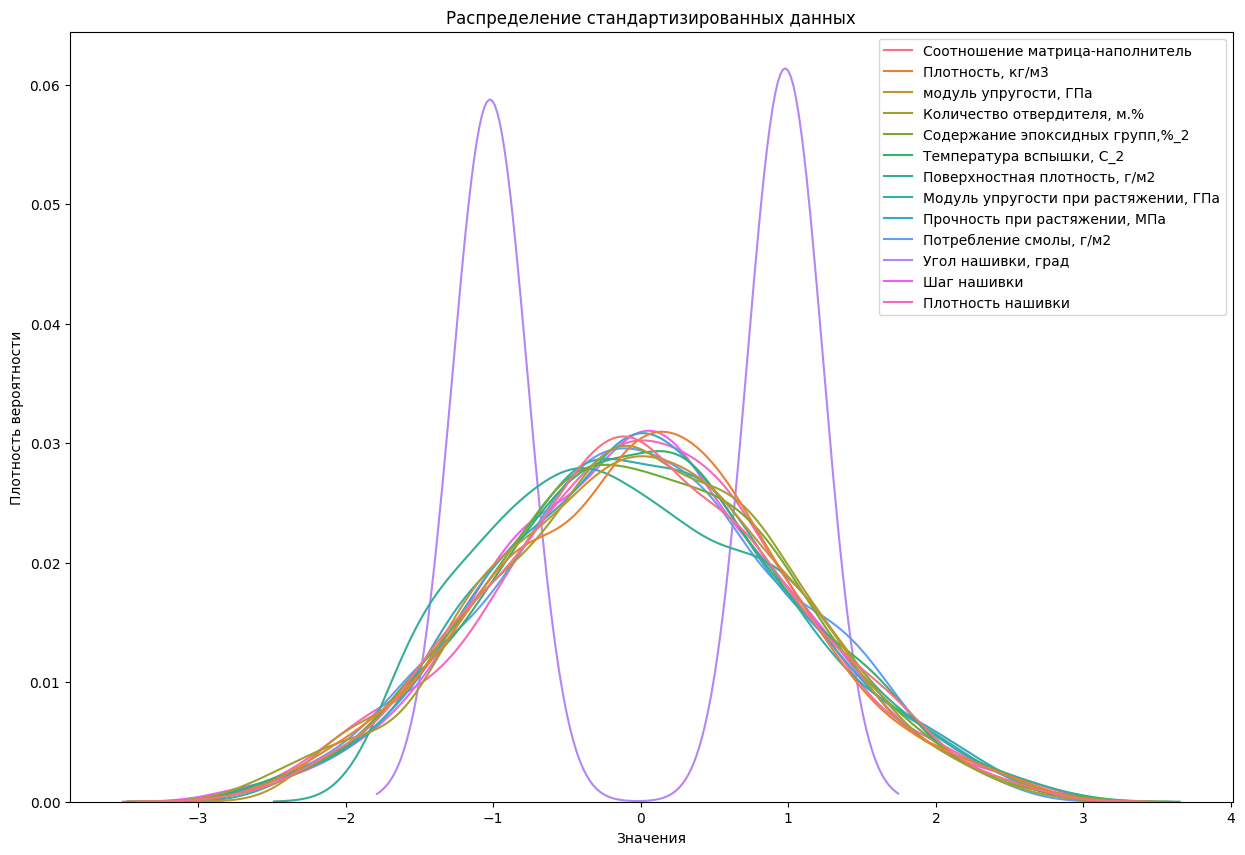

In [22]:
df_standart_1 = preprocessing.StandardScaler().fit(df_no_outliers)
df_std = pd.DataFrame(df_standart_1 .transform(df_no_outliers), columns=df_no_outliers.columns)
fig, ax = plt.subplots(figsize = (15, 10))
sns.kdeplot(df_std, shade=False, color='b', label='Стандартизированные данные')
plt.title('Распределение стандартизированных данных')
plt.xlabel('Значения')
plt.ylabel('Плотность вероятности')
plt.show()

In [23]:
df_std

Соотношение матрица-наполнитель  Плотность, кг/м3  модуль упругости, ГПа  \
0                          -1.196467          0.787037               0.007992   
1                          -1.196467          0.787037               0.007992   
2                          -0.175012          0.787037               0.051553   
3                          -0.178825          0.364514               0.036283   
4                          -0.400390         -0.903054               0.216474   
..                               ...               ...                    ...   
917                        -0.733662         -0.310284               0.539767   
918                         0.576611          1.069974              -0.889924   
919                         0.394018         -0.024589              -0.975122   
920                         0.868603          1.305328               0.016356   
921                         0.983318         -1.178912              -0.973657   

     Количество отвердителя, м.%  Содержание эпоксидных групп,%_2  \
0                      -2.286425                         0.647585   
1                       0.668092                        -0.397291   
2                       0.027074                         0.028123   
3                       0.027074                         0.028123   
4                       0.027074                         0.028123   
..                           ...                              ...   
917                    -0.902956                        -0.868217   
918                     1.303201                        -1.087006   
919                    -0.022536                         0.734311   
920                     1.131763                        -1.234469   
921                     0.674952                         2.204352   

     Температура вспышки, С_2  Поверхностная плотность, г/м2  \
0                   -0.039740                      -0.971971   
1                    0.350738                      -0.971971   
2                   -0.039740                      -0.971971   
3                   -0.039740                      -0.971971   
4                   -0.039740                      -0.971971   
..                        ...                            ...   
917                  0.979545                      -0.974830   
918                 -0.811326                      -0.470122   
919                 -0.958342                       0.919470   
920                 -0.263996                       0.567419   
921                  0.374919                       0.985849   

     Модуль упругости при растяжении, ГПа  Прочность при растяжении, МПа  \
0                               -1.092335                       1.187925   
1                               -1.092335                       1.187925   
2                               -1.092335                       1.187925   
3                               -1.092335                       1.187925   
4                               -1.092335                       1.187925   
..                                    ...                            ...   
917                             -0.070267                      -0.163679   
918                             -0.126524                      -0.223019   
919                              0.473140                       0.444312   
920                              0.244441                      -0.859827   
921                              0.332727                       0.870993   

     Потребление смолы, г/м2  Угол нашивки, град  Шаг нашивки  \
0                   0.034181           -1.021932    -1.166792   
1                   0.034181           -1.021932    -0.768833   
2                   0.034181           -1.021932    -0.768833   
3                   0.034181           -1.021932    -0.768833   
4                   0.034181           -1.021932    -0.768833   
..                       ...                 ...          ...   
917                -1.629244            0.978538     0.853400   
9

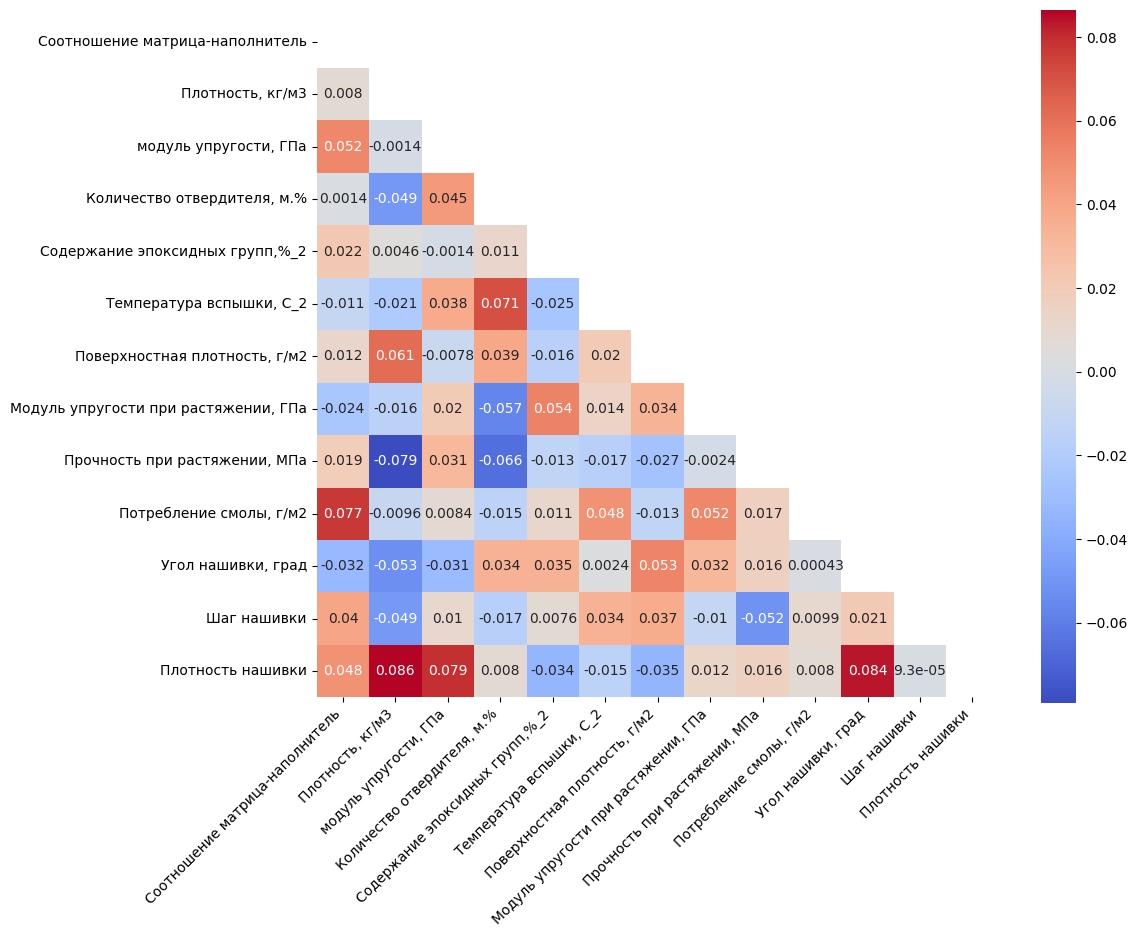

In [24]:
mask = np.triu(df_std.corr())
f, ax = plt.subplots(figsize=(11, 9))
sns.heatmap(df_std.corr(), mask=mask, annot=True, square=True, cmap='coolwarm')
plt.xticks(rotation=45, ha='right')
plt.show()

## Моделирование

### Подготовка к моделированию

#### Разделение на обучающую и тестовую выборки

##### Информация о нормализованном и стандартном датафреймах

In [25]:
df_norm

Соотношение матрица-наполнитель  Плотность, кг/м3  \
1                            0.274768          0.651097   
3                            0.274768          0.651097   
4                            0.466552          0.651097   
5                            0.465836          0.571539   
6                            0.424236          0.332865   
...                               ...               ...   
1018                         0.361662          0.444480   
1019                         0.607674          0.704373   
1020                         0.573391          0.498274   
1021                         0.662497          0.748688   
1022                         0.684036          0.280923   

      модуль упругости, ГПа  Количество отвердителя, м.%  \
1                  0.452951                     0.079153   
3                  0.452951                     0.630983   
4                  0.461725                     0.511257   
5                  0.458649                     0.511257   
6                  0.494944                     0.511257   
...                     ...                          ...   
1018               0.560064                     0.337550   
1019               0.272088                     0.749605   
1020               0.254927                     0.501991   
1021               0.454635                     0.717585   
1022               0.255222                     0.632264   

      Содержание эпоксидных групп,%_2  Температура вспышки, С_2  \
1                            0.607435                  0.509164   
3                            0.418887                  0.583596   
4                            0.495653                  0.509164   
5                            0.495653                  0.509164   
6                            0.495653                  0.509164   
...                               ...                       ...   
1018                         0.333908                  0.703458   
1019                         0.294428                  0.362087   
1020                         0.623085                  0.334063   
1021                         0.267818                  0.466417   
1022                         0.888354                  0.588206   

      Поверхностная плотность, г/м2  Модуль упругости при растяжении, ГПа  \
1                          0.162230                              0.272962   
3                          0.162230                              0.272962   
4                          0.162230                              0.272962   
5                          0.162230                              0.272962   
6                          0.162230                              0.272962   
...                             ...                                   ...   
1018                       0.161609                              0.473553   
1019                       0.271207                              0.462512   
1020                       0.572959                              0.580201   
1021                       0.496511                              0.535317   
1022                       0.587373                              0.552644   

      Прочность при растяжении, МПа  Потребление смолы, г/м2  \
1                          0.727777                 0.514688   
3                          0.727777                 0.514688   
4                          0.727777                 0.514688   
5                          0.727777                 0.514688   
6                          0.727777                 0.514688   
...                             ...                      ...   
1018                       0.472912                 0.183151   
1019                       0.461722                 0.157752   
1020                       0.587558                 0.572648   
1021                       0.341643                 0.434855   
1022                       0.668015                 0.426577   

      Угол нашивки, град  Шаг нашивки  Плотность нашивки  
1                 

In [26]:
df_norm.info()

<class 'pandas.core.frame.DataFrame'>
Index: 922 entries, 1 to 1022
Data columns (total 13 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Соотношение матрица-наполнитель       922 non-null    float64
 1   Плотность, кг/м3                      922 non-null    float64
 2   модуль упругости, ГПа                 922 non-null    float64
 3   Количество отвердителя, м.%           922 non-null    float64
 4   Содержание эпоксидных групп,%_2       922 non-null    float64
 5   Температура вспышки, С_2              922 non-null    float64
 6   Поверхностная плотность, г/м2         922 non-null    float64
 7   Модуль упругости при растяжении, ГПа  922 non-null    float64
 8   Прочность при растяжении, МПа         922 non-null    float64
 9   Потребление смолы, г/м2               922 non-null    float64
 10  Угол нашивки, град                    922 non-null    float64
 11  Шаг нашивки            

In [27]:
df_std

Соотношение матрица-наполнитель  Плотность, кг/м3  модуль упругости, ГПа  \
0                          -1.196467          0.787037               0.007992   
1                          -1.196467          0.787037               0.007992   
2                          -0.175012          0.787037               0.051553   
3                          -0.178825          0.364514               0.036283   
4                          -0.400390         -0.903054               0.216474   
..                               ...               ...                    ...   
917                        -0.733662         -0.310284               0.539767   
918                         0.576611          1.069974              -0.889924   
919                         0.394018         -0.024589              -0.975122   
920                         0.868603          1.305328               0.016356   
921                         0.983318         -1.178912              -0.973657   

     Количество отвердителя, м.%  Содержание эпоксидных групп,%_2  \
0                      -2.286425                         0.647585   
1                       0.668092                        -0.397291   
2                       0.027074                         0.028123   
3                       0.027074                         0.028123   
4                       0.027074                         0.028123   
..                           ...                              ...   
917                    -0.902956                        -0.868217   
918                     1.303201                        -1.087006   
919                    -0.022536                         0.734311   
920                     1.131763                        -1.234469   
921                     0.674952                         2.204352   

     Температура вспышки, С_2  Поверхностная плотность, г/м2  \
0                   -0.039740                      -0.971971   
1                    0.350738                      -0.971971   
2                   -0.039740                      -0.971971   
3                   -0.039740                      -0.971971   
4                   -0.039740                      -0.971971   
..                        ...                            ...   
917                  0.979545                      -0.974830   
918                 -0.811326                      -0.470122   
919                 -0.958342                       0.919470   
920                 -0.263996                       0.567419   
921                  0.374919                       0.985849   

     Модуль упругости при растяжении, ГПа  Прочность при растяжении, МПа  \
0                               -1.092335                       1.187925   
1                               -1.092335                       1.187925   
2                               -1.092335                       1.187925   
3                               -1.092335                       1.187925   
4                               -1.092335                       1.187925   
..                                    ...                            ...   
917                             -0.070267                      -0.163679   
918                             -0.126524                      -0.223019   
919                              0.473140                       0.444312   
920                              0.244441                      -0.859827   
921                              0.332727                       0.870993   

     Потребление смолы, г/м2  Угол нашивки, град  Шаг нашивки  \
0                   0.034181           -1.021932    -1.166792   
1                   0.034181           -1.021932    -0.768833   
2                   0.034181           -1.021932    -0.768833   
3                   0.034181           -1.021932    -0.768833   
4                   0.034181           -1.021932    -0.768833   
..                       ...                 ...          ...   
917                -1.629244            0.978538     0.853400   
9

In [28]:
df_std.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 922 entries, 0 to 921
Data columns (total 13 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Соотношение матрица-наполнитель       922 non-null    float64
 1   Плотность, кг/м3                      922 non-null    float64
 2   модуль упругости, ГПа                 922 non-null    float64
 3   Количество отвердителя, м.%           922 non-null    float64
 4   Содержание эпоксидных групп,%_2       922 non-null    float64
 5   Температура вспышки, С_2              922 non-null    float64
 6   Поверхностная плотность, г/м2         922 non-null    float64
 7   Модуль упругости при растяжении, ГПа  922 non-null    float64
 8   Прочность при растяжении, МПа         922 non-null    float64
 9   Потребление смолы, г/м2               922 non-null    float64
 10  Угол нашивки, град                    922 non-null    float64
 11  Шаг нашивки        

##### Разделение нормализованной выборки

In [29]:
#Входные данные
x_norm = df_norm.drop(['Модуль упругости при растяжении, ГПа','Прочность при растяжении, МПа'], axis=1)
#Целевые признаки
y_norm_upr = df_norm[['Модуль упругости при растяжении, ГПа']]
y_norm_pr = df_norm[['Прочность при растяжении, МПа']]

In [30]:
#Делим данные на обучающую и тестовую выборку в соотношении 70% и 30% соответственно
X_norm_train_upr, X_norm_test_upr, y_norm_train_upr, y_norm_test_upr = train_test_split(x_norm, y_norm_upr, test_size=0.3, random_state=2)
X_norm_train_pr, X_norm_test_pr, y_norm_train_pr, y_norm_test_pr = train_test_split(x_norm, y_norm_pr, test_size=0.3, random_state=1)

In [31]:
X_norm_train_upr.info()

<class 'pandas.core.frame.DataFrame'>
Index: 645 entries, 349 to 188
Data columns (total 11 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Соотношение матрица-наполнитель  645 non-null    float64
 1   Плотность, кг/м3                 645 non-null    float64
 2   модуль упругости, ГПа            645 non-null    float64
 3   Количество отвердителя, м.%      645 non-null    float64
 4   Содержание эпоксидных групп,%_2  645 non-null    float64
 5   Температура вспышки, С_2         645 non-null    float64
 6   Поверхностная плотность, г/м2    645 non-null    float64
 7   Потребление смолы, г/м2          645 non-null    float64
 8   Угол нашивки, град               645 non-null    float64
 9   Шаг нашивки                      645 non-null    float64
 10  Плотность нашивки                645 non-null    float64
dtypes: float64(11)
memory usage: 60.5 KB


In [32]:
X_norm_train_upr

Соотношение матрица-наполнитель  Плотность, кг/м3  модуль упругости, ГПа  \
349                         0.487395          0.531335               0.566356   
924                         0.275971          0.554733               0.061550   
414                         0.522432          0.381850               0.719009   
122                         0.350444          0.774472               0.107530   
693                         0.523627          0.347759               0.290147   
..                               ...               ...                    ...   
607                         0.462287          0.736341               0.248245   
661                         0.723318          0.577238               0.281491   
564                         0.698068          0.487362               0.688084   
600                         0.352131          0.640150               0.369542   
188                         0.546921          0.431179               0.504544   

     Количество отвердителя, м.%  Содержание эпоксидных групп,%_2  \
349                     0.549189                         0.366496   
924                     0.727360                         0.637922   
414                     0.308912                         0.375752   
122                     0.267382                         0.402886   
693                     0.277264                         0.745198   
..                           ...                              ...   
607                     0.463284                         0.450476   
661                     0.670516                         0.772966   
564                     0.711421                         0.403005   
600                     0.769018                         0.227403   
188                     0.428741                         0.582381   

     Температура вспышки, С_2  Поверхностная плотность, г/м2  \
349                  0.261467                       0.867785   
924                  0.849159                       0.019718   
414                  0.667150                       0.155246   
122                  0.618920                       0.551649   
693                  0.479373                       0.169163   
..                        ...                            ...   
607                  0.431028                       0.004945   
661                  0.637985                       0.557530   
564                  0.276604                       0.759502   
600                  0.122672                       0.351932   
188                  0.979630                       0.540920   

     Потребление смолы, г/м2  Угол нашивки, град  Шаг нашивки  \
349                 0.124987                 0.0     0.111574   
924                 0.485873                 1.0     0.490829   
414                 0.796515                 0.0     0.462451   
122                 0.408184                 0.0     0.401569   
693                 0.539100                 1.0     0.304069   
..                       ...                 ...          ...   
607                 0.287511                 1.0     0.420918   
661                 0.519845                 1.0     0.333418   
564                 0.373943                 1.0     0.349982   
600                 0.395812                 1.0     0.429048   
188                 0.284718                 0.0     0.224502   

     Плотность нашивки  
349           0.205931  
924           0.561927  
414           0.414305  
122           0.665848  
693           0.590235  
..                 ...  
607           0.710958  
661           0.657627  
564           0.497698  
600           0.695992  
188           0.000000  

[645 rows x 11 columns]

In [33]:
X_norm_train_pr.info()

<class 'pandas.core.frame.DataFrame'>
Index: 645 entries, 513 to 42
Data columns (total 11 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Соотношение матрица-наполнитель  645 non-null    float64
 1   Плотность, кг/м3                 645 non-null    float64
 2   модуль упругости, ГПа            645 non-null    float64
 3   Количество отвердителя, м.%      645 non-null    float64
 4   Содержание эпоксидных групп,%_2  645 non-null    float64
 5   Температура вспышки, С_2         645 non-null    float64
 6   Поверхностная плотность, г/м2    645 non-null    float64
 7   Потребление смолы, г/м2          645 non-null    float64
 8   Угол нашивки, град               645 non-null    float64
 9   Шаг нашивки                      645 non-null    float64
 10  Плотность нашивки                645 non-null    float64
dtypes: float64(11)
memory usage: 60.5 KB


##### Разделение стандартизированной выборки

In [34]:
#Входные данные
x_std = df_std.drop(['Модуль упругости при растяжении, ГПа','Прочность при растяжении, МПа'], axis=1)
#Целевые признаки
y_std_upr = df_std[['Модуль упругости при растяжении, ГПа']]
y_std_pr = df_std[['Прочность при растяжении, МПа']]

In [35]:
#Делим данные на обучающую и тестовую выборку в соотношении 70% и 30% соответственно
X_std_train_upr, X_std_test_upr, y_std_train_upr, y_std_test_upr = train_test_split(x_std, y_std_upr, test_size=0.3, random_state=2)
X_std_train_pr, X_std_test_pr, y_std_train_pr, y_std_test_pr = train_test_split(x_std, y_std_pr, test_size=0.3, random_state=1)

In [36]:
X_std_train_upr.info()

<class 'pandas.core.frame.DataFrame'>
Index: 645 entries, 308 to 168
Data columns (total 11 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Соотношение матрица-наполнитель  645 non-null    float64
 1   Плотность, кг/м3                 645 non-null    float64
 2   модуль упругости, ГПа            645 non-null    float64
 3   Количество отвердителя, м.%      645 non-null    float64
 4   Содержание эпоксидных групп,%_2  645 non-null    float64
 5   Температура вспышки, С_2         645 non-null    float64
 6   Поверхностная плотность, г/м2    645 non-null    float64
 7   Потребление смолы, г/м2          645 non-null    float64
 8   Угол нашивки, град               645 non-null    float64
 9   Шаг нашивки                      645 non-null    float64
 10  Плотность нашивки                645 non-null    float64
dtypes: float64(11)
memory usage: 60.5 KB


In [37]:
X_std_train_upr

Соотношение матрица-наполнитель  Плотность, кг/м3  модуль упругости, ГПа  \
308                        -0.064004          0.150992               0.571007   
827                        -1.190062          0.275257              -1.935166   
365                         0.122608         -0.642901               1.328871   
108                        -0.793415          1.442265              -1.706894   
614                         0.128973         -0.823956              -0.800266   
..                               ...               ...                    ...   
534                        -0.197730          1.239755              -1.008297   
584                         1.192536          0.394779              -0.843242   
493                         1.058056         -0.082541               1.175339   
527                        -0.784426          0.728894              -0.406103   
168                         0.253034         -0.380923               0.264134   

     Количество отвердителя, м.%  Содержание эпоксидных групп,%_2  \
308                     0.230163                        -0.687623   
827                     1.184096                         0.816531   
365                    -1.056285                        -0.636330   
108                    -1.278640                        -0.485962   
614                    -1.225733                         1.411026   
..                           ...                              ...   
534                    -0.229775                        -0.222236   
584                     0.879753                         1.564906   
493                     1.098757                        -0.485302   
527                     1.407138                        -1.458436   
168                    -0.414717                         0.508740   

     Температура вспышки, С_2  Поверхностная плотность, г/м2  \
308                 -1.339190                       2.277166   
827                  1.743909                      -1.628253   
365                  0.789069                      -1.004135   
108                  0.536052                       0.821335   
614                 -0.196030                      -0.940042   
..                        ...                            ...   
534                 -0.449651                      -1.696281   
584                  0.636067                       0.848416   
493                 -1.259778                       1.778515   
527                 -2.067324                      -0.098377   
168                  2.428378                       0.771926   

     Потребление смолы, г/м2  Угол нашивки, град  Шаг нашивки  \
308                -1.921071           -1.021932    -2.135579   
827                -0.110393            0.978538    -0.068654   
365                 1.448197           -1.021932    -0.223311   
108                -0.500182           -1.021932    -0.555116   
614                 0.156662            0.978538    -1.086488   
..                       ...                 ...          ...   
534                -1.105641            0.978538    -0.449664   
584                 0.060054            0.978538    -0.926538   
493                -0.671981            0.978538    -0.836265   
527                -0.562261            0.978538    -0.405356   
168                -1.119653           -1.021932    -1.520122   

     Плотность нашивки  
308          -1.537488  
827           0.299180  
365          -0.462437  
108           0.835328  
614           0.445223  
..                 ...  
534           1.068063  
584           0.792913  
493          -0.032194  
527           0.990848  
168          -2.599929  

[645 rows x 11 columns]

In [38]:
X_std_train_pr.info()

<class 'pandas.core.frame.DataFrame'>
Index: 645 entries, 446 to 37
Data columns (total 11 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Соотношение матрица-наполнитель  645 non-null    float64
 1   Плотность, кг/м3                 645 non-null    float64
 2   модуль упругости, ГПа            645 non-null    float64
 3   Количество отвердителя, м.%      645 non-null    float64
 4   Содержание эпоксидных групп,%_2  645 non-null    float64
 5   Температура вспышки, С_2         645 non-null    float64
 6   Поверхностная плотность, г/м2    645 non-null    float64
 7   Потребление смолы, г/м2          645 non-null    float64
 8   Угол нашивки, град               645 non-null    float64
 9   Шаг нашивки                      645 non-null    float64
 10  Плотность нашивки                645 non-null    float64
dtypes: float64(11)
memory usage: 60.5 KB


#### Задание метрик

Для сравнения моделей между собой найдем коэффициент детерминации. Чем ближе его значение к 1, тем лучше модель. Так же оценим MSE, MAE и точность на основе MAE.


Среднюю квадратичную ошибку (MSE) нельзя никак интерпретировать. Её можно только сравнить со среднеквадратичной ошибкой другой модели. Т.е. это только способ сравнить 2 модели между собой.
Средняя абсолютная ошибка (MAE) лучше в этом плане, по ней мы уже можем понять абсолютное значение, на которое модель ошибается. (Например, предсказывали цену и знаем на сколько рублей модель может ошибаться). Но для неё менее ощутимая разница между большой и маленькой ошибкой, а вот среднее квадратичная оценка сразу выявляет большие ошибки, т.к. мы возводим значения в квадрат. 

In [39]:
def print_metrics(y_test_values, y_pred_values):
    MSE = metrics.mean_squared_error(y_test_values, y_pred_values)
    MAE = metrics.mean_absolute_error(y_test_values, y_pred_values)
    RMSE = np.sqrt(MSE)  
    CoefDet = r2_score(y_test_values, y_pred_values)
    accuracy = 100 - (MAE/ np.mean(y_test_values)) * 100
    print("Среднеквадратическая ошибка MSE:", np.round(MSE, 3))
    print("Средняя абсолютная ошибка MAE:", np.round(MAE, 3))
    print("Корень из среднеквадратической ошибки RMSE:", np.round(RMSE, 3))
    print("Коэффициент детерминации R2:", np.round(CoefDet, 3))
    print('Точность модели (%)', np.round(accuracy, 3))

#### Функция для поиска гиперпараметров

In [40]:
def Search_Model_Param(model_p, param_p, x_p, y_p):
    gs = GridSearchCV(model_p, param_p, cv = 3, verbose = 2, n_jobs =-1, scoring = 'r2')
    gs.fit(x_p, y_p)
    print(f"Лучшие гиперпараметры: {gs.best_params_}")
    print(f"Модель с оптимальными гипермараметрами: {gs.best_estimator_}")

### Модели

#### Метод опорных векторов

##### Модуль упругости при растяжении, ГПа

In [41]:
svr_upr = SVR(kernel = 'sigmoid', C = 1, epsilon = 1.0)
svr_upr.fit(X_std_train_upr, np.ravel(y_std_train_upr)) #обучаем модель
y_pred_svr_upr = svr_upr.predict(X_std_test_upr)
print('Результаты обучения методом опорных векторов для величины "Модуль упругости при растяжении, ГПа":') 
print_metrics(y_std_test_upr, y_pred_svr_upr)

Результаты обучения методом опорных векторов для величины "Модуль упругости при растяжении, ГПа":
Среднеквадратическая ошибка MSE: 1.059
Средняя абсолютная ошибка MAE: 0.811
Корень из среднеквадратической ошибки RMSE: 1.029
Коэффициент детерминации R2: -0.102
Точность модели (%) -2370.807


In [42]:
model_svr=SVR()
params_svr_upr= {"C": [0.1, 1, 10], 
                 "epsilon": [0.01, 0.1, 1], 
                 "kernel": ["linear", "rbf"]}

Search_Model_Param(model_svr, params_svr_upr, X_std_train_upr, y_std_train_upr)

Fitting 3 folds for each of 18 candidates, totalling 54 fits
Лучшие гиперпараметры: {'C': 0.1, 'epsilon': 1, 'kernel': 'rbf'}
Модель с оптимальными гипермараметрами: SVR(C=0.1, epsilon=1)


In [43]:
svr_upr_hyp = SVR(C=0.1, epsilon=1)
svr_upr_hyp.fit(X_std_train_upr, np.ravel(y_std_train_upr)) #обучаем модель
y_pred_svr_upr_hyp = svr_upr_hyp.predict(X_std_test_upr)
print('Результаты обучения методом опорных векторов для величины "Модуль упругости при растяжении, ГПа":') 
print_metrics(y_std_test_upr, y_pred_svr_upr_hyp)

Результаты обучения методом опорных векторов для величины "Модуль упругости при растяжении, ГПа":
Среднеквадратическая ошибка MSE: 0.969
Средняя абсолютная ошибка MAE: 0.792
Корень из среднеквадратической ошибки RMSE: 0.985
Коэффициент детерминации R2: -0.009
Точность модели (%) -2313.153


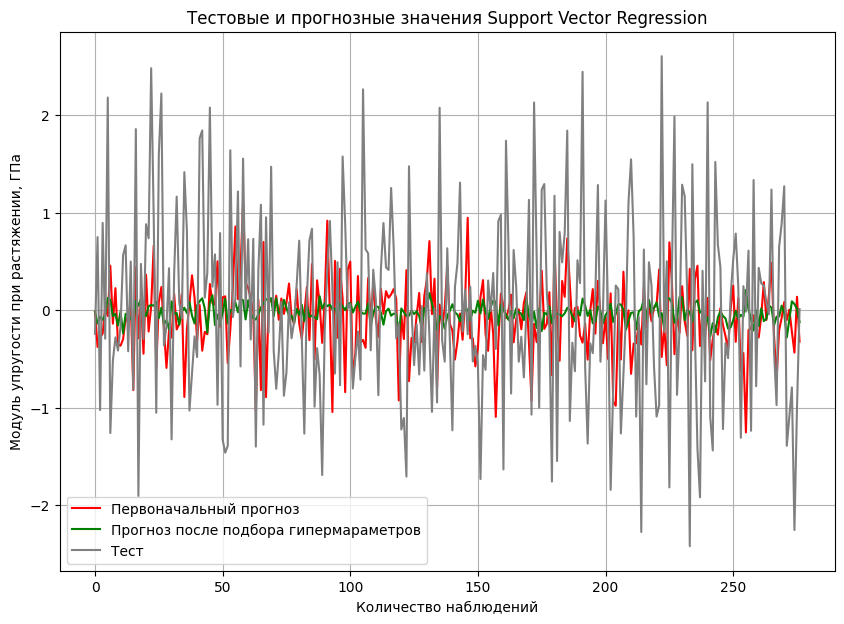

In [44]:
plt.figure(figsize = (10, 7))
plt.title("Тестовые и прогнозные значения Support Vector Regression")
plt.plot(y_pred_svr_upr, label = "Первоначальный прогноз", color = "red")
plt.plot(y_pred_svr_upr_hyp, label = "Прогноз после подбора гипермараметров", color = "green")
plt.plot(y_std_test_upr.values, label = "Тест", color = "grey")
plt.xlabel("Количество наблюдений")
plt.ylabel("Модуль упругости при растяжении, ГПа")
plt.legend()
plt.grid(True)

##### Прочность при растяжении, МПа

In [45]:
svr_pr = SVR(kernel = 'poly', C = 1, epsilon = 1.0)
svr_pr.fit(X_std_train_pr, np.ravel(y_std_train_pr)) #обучаем модель
y_pred_svr_pr = svr_pr.predict(X_std_test_pr)
print('Результаты обучения методом опорных векторов "Прочность при растяжении, МПа":') 
print_metrics(y_std_test_pr, y_pred_svr_pr)

Результаты обучения методом опорных векторов "Прочность при растяжении, МПа":
Среднеквадратическая ошибка MSE: 1.13
Средняя абсолютная ошибка MAE: 0.848
Корень из среднеквадратической ошибки RMSE: 1.063
Коэффициент детерминации R2: -0.153
Точность модели (%) -1428.847


In [46]:
model_svr=SVR()
params_svr_pr= {"C": [0.1, 1, 10], 
                 "epsilon": [0.01, 0.1, 1], 
                 "kernel": ["linear", "rbf"]}

Search_Model_Param(model_svr, params_svr_pr, X_std_train_pr, y_std_train_pr)

Fitting 3 folds for each of 18 candidates, totalling 54 fits
Лучшие гиперпараметры: {'C': 0.1, 'epsilon': 1, 'kernel': 'rbf'}
Модель с оптимальными гипермараметрами: SVR(C=0.1, epsilon=1)


In [47]:
svr_pr_hyp = SVR(C=0.1, epsilon=1)
svr_pr_hyp.fit(X_std_train_pr, np.ravel(y_std_train_pr)) #обучаем модель
y_pred_svr_pr_hyp = svr_pr_hyp.predict(X_std_test_pr)
print('Результаты обучения методом опорных векторов "Прочность при растяжении, МПа":') 
print_metrics(y_std_test_pr, y_pred_svr_pr_hyp)

Результаты обучения методом опорных векторов "Прочность при растяжении, МПа":
Среднеквадратическая ошибка MSE: 0.981
Средняя абсолютная ошибка MAE: 0.799
Корень из среднеквадратической ошибки RMSE: 0.99
Коэффициент детерминации R2: -0.001
Точность модели (%) -1339.739


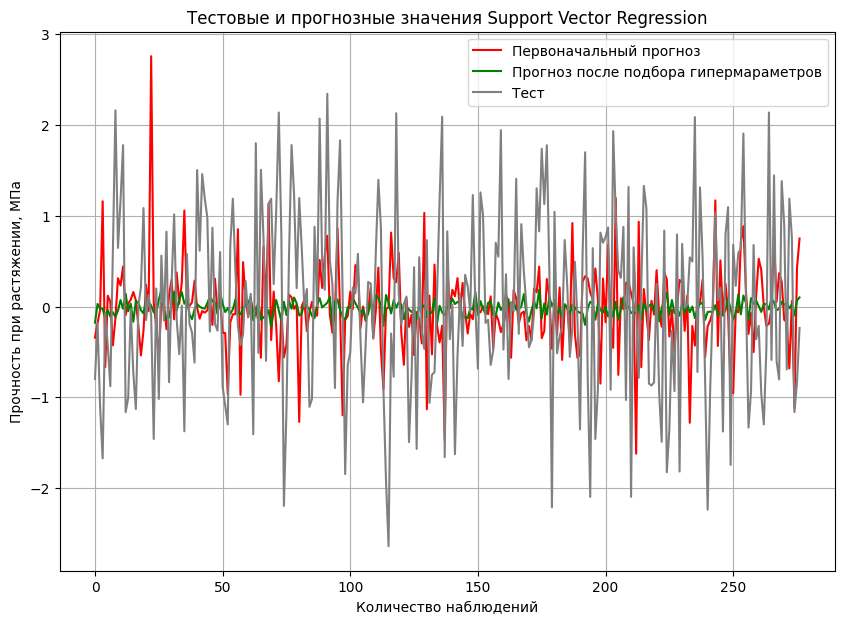

In [48]:
plt.figure(figsize = (10, 7))
plt.title("Тестовые и прогнозные значения Support Vector Regression")
plt.plot(y_pred_svr_pr, label = "Первоначальный прогноз", color = "red")
plt.plot(y_pred_svr_pr_hyp, label = "Прогноз после подбора гипермараметров", color = "green")
plt.plot(y_std_test_pr.values, label = "Тест", color = "grey")
plt.xlabel("Количество наблюдений")
plt.ylabel("Прочность при растяжении, МПа")
plt.legend()
plt.grid(True)

#### Линейная регрессия

##### Модуль упругости при растяжении, ГПа

In [49]:
lr_upr = LinearRegression()
lr_upr.fit(X_norm_train_upr, y_norm_train_upr) #обучаем модель
y_pred_lr_upr = lr_upr.predict(X_norm_test_upr)
print('Результаты обучения методом линейной регрессии для величины "Модуль упругости при растяжении, ГПа":') 
print_metrics(y_norm_test_upr, y_pred_lr_upr)

Результаты обучения методом линейной регрессии для величины "Модуль упругости при растяжении, ГПа":
Среднеквадратическая ошибка MSE: 0.038
Средняя абсолютная ошибка MAE: 0.156
Корень из среднеквадратической ошибки RMSE: 0.194
Коэффициент детерминации R2: -0.016
Точность модели (%) 68.328


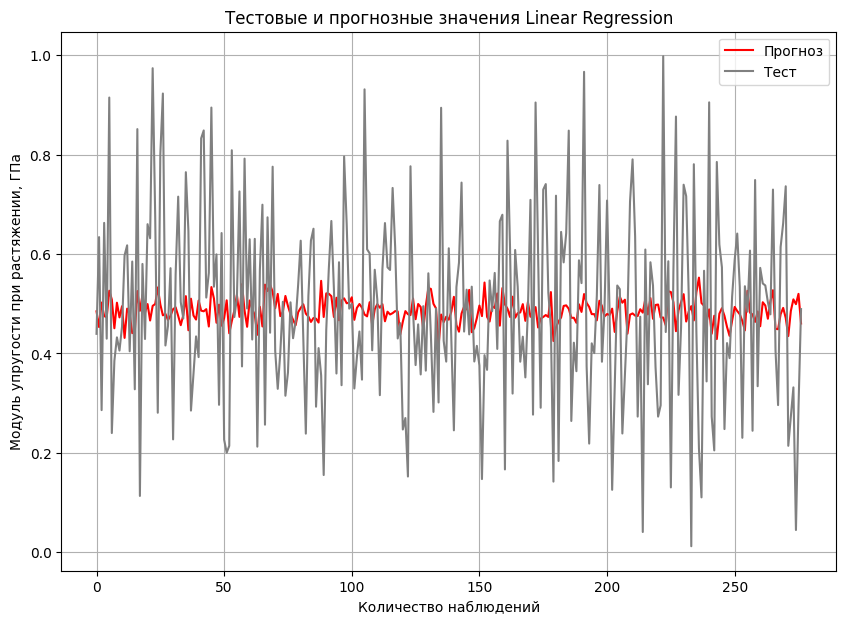

In [50]:
plt.figure(figsize = (10, 7))
plt.title("Тестовые и прогнозные значения Linear Regression")
plt.plot(y_pred_lr_upr, label = "Прогноз", color = "red")
plt.plot(y_norm_test_upr.values, label = "Тест", color = "grey")
plt.xlabel("Количество наблюдений")
plt.ylabel("Модуль упругости при растяжении, ГПа")
plt.legend()
plt.grid(True)

##### Прочность при растяжении, МПа

In [51]:
lr_pr = LinearRegression()
lr_pr.fit(X_norm_train_pr, y_norm_train_pr) #обучаем модель
y_pred_lr_pr = lr_pr.predict(X_norm_test_pr)
print('Результаты обучения методом линейной регрессии "Прочность при растяжении, МПа":') 
print_metrics(y_norm_test_pr, y_pred_lr_pr)

Результаты обучения методом линейной регрессии "Прочность при растяжении, МПа":
Среднеквадратическая ошибка MSE: 0.035
Средняя абсолютная ошибка MAE: 0.15
Корень из среднеквадратической ошибки RMSE: 0.186
Коэффициент детерминации R2: 0.009
Точность модели (%) 70.841


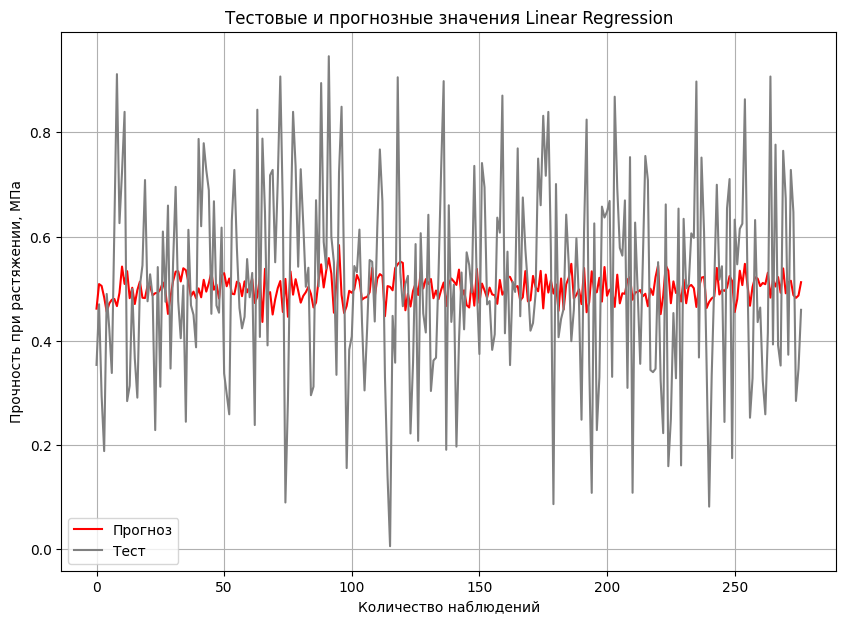

In [52]:
plt.figure(figsize = (10, 7))
plt.title("Тестовые и прогнозные значения Linear Regression")
plt.plot(y_pred_lr_pr, label = "Прогноз", color = "red")
plt.plot(y_norm_test_pr.values, label = "Тест", color = "grey")
plt.xlabel("Количество наблюдений")
plt.ylabel("Прочность при растяжении, МПа")
plt.legend()
plt.grid(True)

#### Метод k-ближайших соседей

##### Модуль упругости при растяжении, ГПа

In [53]:
knr_upr = KNeighborsRegressor(n_neighbors=100)
knr_upr.fit(X_norm_train_upr, y_norm_train_upr) #обучаем модель
y_pred_knr_upr = knr_upr.predict(X_norm_test_upr)
print('Результаты обучения методом k-ближайших соседей для величины "Модуль упругости при растяжении, ГПа":') 
print_metrics(y_norm_test_upr, y_pred_knr_upr)

Результаты обучения методом k-ближайших соседей для величины "Модуль упругости при растяжении, ГПа":
Среднеквадратическая ошибка MSE: 0.037
Средняя абсолютная ошибка MAE: 0.155
Корень из среднеквадратической ошибки RMSE: 0.193
Коэффициент детерминации R2: -0.005
Точность модели (%) 68.69


In [54]:
model_knr=KNeighborsRegressor()
params_knr_upr= {"n_neighbors": [3, 5, 7, 10, 15, 20, 25, 30, 35, 40, 45, 50, 100, 150, 200, 250, 500], "weights": ["uniform", "distance"]}

Search_Model_Param(model_knr, params_knr_upr, X_norm_train_upr, y_norm_train_upr)

Fitting 3 folds for each of 34 candidates, totalling 102 fits
Лучшие гиперпараметры: {'n_neighbors': 200, 'weights': 'distance'}
Модель с оптимальными гипермараметрами: KNeighborsRegressor(n_neighbors=200, weights='distance')


In [55]:
knr_upr_hyp = KNeighborsRegressor(n_neighbors=200)
knr_upr_hyp.fit(X_norm_train_upr, y_norm_train_upr) #обучаем модель
y_pred_knr_upr_hyp = knr_upr_hyp.predict(X_norm_test_upr)
print('Результаты обучения методом k-ближайших соседей для величины "Модуль упругости при растяжении, ГПа":') 
print_metrics(y_norm_test_upr, y_pred_knr_upr_hyp)

Результаты обучения методом k-ближайших соседей для величины "Модуль упругости при растяжении, ГПа":
Среднеквадратическая ошибка MSE: 0.037
Средняя абсолютная ошибка MAE: 0.154
Корень из среднеквадратической ошибки RMSE: 0.192
Коэффициент детерминации R2: 0.002
Точность модели (%) 68.912


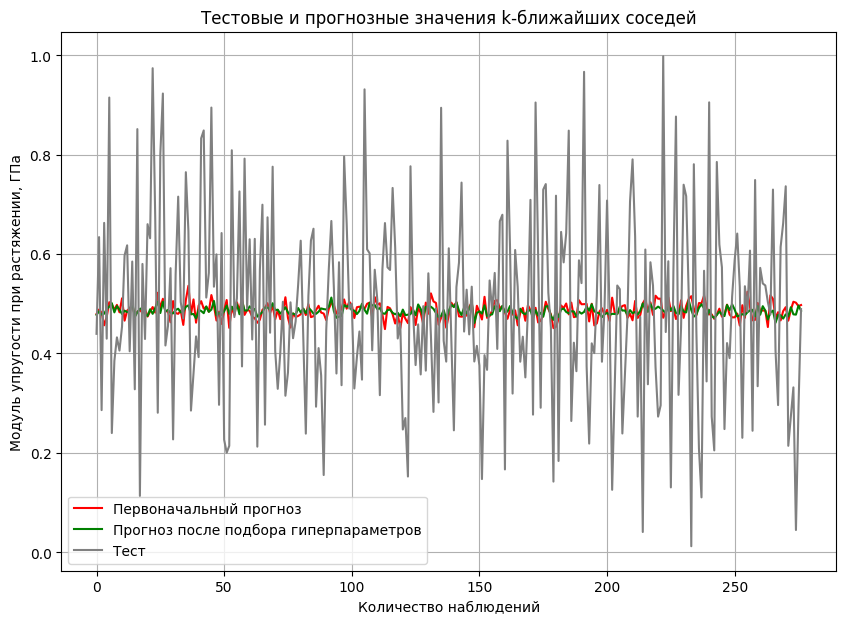

In [56]:
plt.figure(figsize = (10, 7))
plt.title("Тестовые и прогнозные значения k-ближайших соседей")
plt.plot(y_pred_knr_upr, label = "Первоначальный прогноз", color = "red")
plt.plot(y_pred_knr_upr_hyp, label = "Прогноз после подбора гиперпараметров", color = "green")
plt.plot(y_norm_test_upr.values, label = "Тест", color = "grey")
plt.xlabel("Количество наблюдений")
plt.ylabel("Модуль упругости при растяжении, ГПа")
plt.legend()
plt.grid(True)

##### Прочность при растяжении, МПа

In [57]:
knr_pr = KNeighborsRegressor(n_neighbors=100)
knr_pr.fit(X_norm_train_pr, y_norm_train_pr) #обучаем модель
y_pred_knr_pr = knr_pr.predict(X_norm_test_pr)
print('Результаты обучения методом k-ближайших соседей "Прочность при растяжении, МПа":') 
print_metrics(y_norm_test_pr, y_pred_knr_pr)

Результаты обучения методом k-ближайших соседей "Прочность при растяжении, МПа":
Среднеквадратическая ошибка MSE: 0.035
Средняя абсолютная ошибка MAE: 0.152
Корень из среднеквадратической ошибки RMSE: 0.188
Коэффициент детерминации R2: -0.012
Точность модели (%) 70.472


In [58]:
model_knr=KNeighborsRegressor()
params_knr_pr= {"n_neighbors": [3, 5, 7, 10, 15, 20, 25, 30, 35, 40, 45, 50, 100, 150, 200, 250, 400, 500], "weights": ["uniform", "distance"]}

Search_Model_Param(model_knr, params_knr_pr, X_norm_train_pr, y_norm_train_pr)

Fitting 3 folds for each of 36 candidates, totalling 108 fits
Лучшие гиперпараметры: {'n_neighbors': 150, 'weights': 'distance'}
Модель с оптимальными гипермараметрами: KNeighborsRegressor(n_neighbors=150, weights='distance')


In [59]:
knr_pr_hyp = KNeighborsRegressor(n_neighbors=150, weights='distance')
knr_pr_hyp.fit(X_norm_train_pr, y_norm_train_pr) #обучаем модель
y_pred_knr_pr_hyp = knr_pr_hyp.predict(X_norm_test_pr)
print('Результаты обучения методом k-ближайших соседей "Прочность при растяжении, МПа":') 
print_metrics(y_norm_test_pr, y_pred_knr_pr_hyp)

Результаты обучения методом k-ближайших соседей "Прочность при растяжении, МПа":
Среднеквадратическая ошибка MSE: 0.035
Средняя абсолютная ошибка MAE: 0.152
Корень из среднеквадратической ошибки RMSE: 0.188
Коэффициент детерминации R2: -0.01
Точность модели (%) 70.492


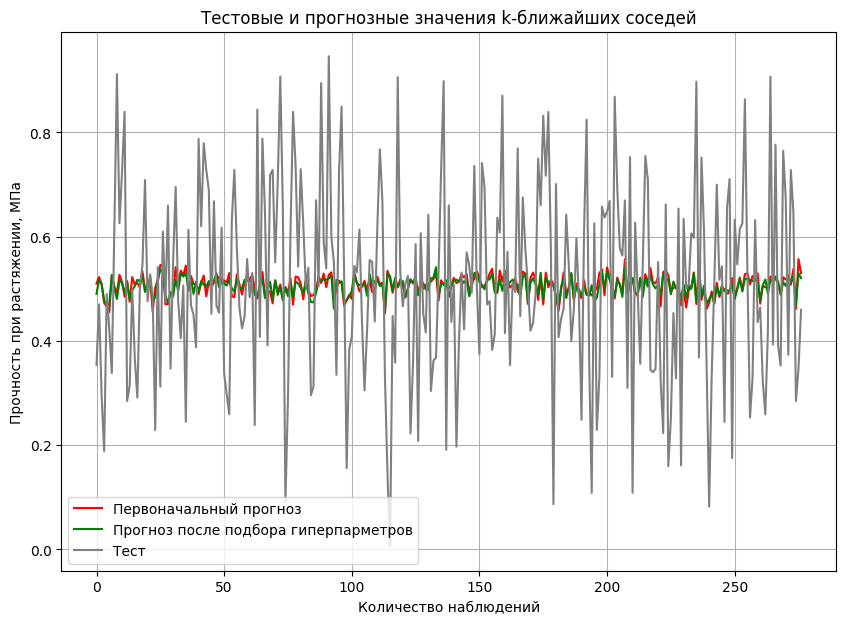

In [60]:
plt.figure(figsize = (10, 7))
plt.title("Тестовые и прогнозные значения k-ближайших соседей")
plt.plot(y_pred_knr_pr, label = "Первоначальный прогноз", color = "red")
plt.plot(y_pred_knr_pr_hyp, label = "Прогноз после подбора гиперпарметров", color = "green")
plt.plot(y_norm_test_pr.values, label = "Тест", color = "grey")
plt.xlabel("Количество наблюдений")
plt.ylabel("Прочность при растяжении, МПа")
plt.legend()
plt.grid(True)

#### Случайный лес

##### Модуль упругости при растяжении, ГПа

In [61]:
rf_upr = RandomForestRegressor(min_samples_split=10, max_features='sqrt', random_state=3)
rf_upr.fit(X_norm_train_upr, y_norm_train_upr) #обучаем модель
y_pred_rf_upr = rf_upr.predict(X_norm_test_upr)
print('Результаты обучения методом случайного леса для величины "Модуль упругости при растяжении, ГПа":') 
print_metrics(y_norm_test_upr, y_pred_rf_upr)

Результаты обучения методом случайного леса для величины "Модуль упругости при растяжении, ГПа":
Среднеквадратическая ошибка MSE: 0.038
Средняя абсолютная ошибка MAE: 0.156
Корень из среднеквадратической ошибки RMSE: 0.195
Коэффициент детерминации R2: -0.027
Точность модели (%) 68.331


In [62]:
model_rf=RandomForestRegressor()
params_rf_upr = {"min_samples_split": [2, 5, 9, 10, 20, 30, 40, 50, 60, 70], "max_features": ['sqrt', 'n/3'], "random_state": [3]}

Search_Model_Param(model_rf, params_rf_upr, X_norm_train_upr, y_norm_train_upr)

Fitting 3 folds for each of 20 candidates, totalling 60 fits
Лучшие гиперпараметры: {'max_features': 'sqrt', 'min_samples_split': 60, 'random_state': 3}
Модель с оптимальными гипермараметрами: RandomForestRegressor(max_features='sqrt', min_samples_split=60, random_state=3)


In [63]:
rf_upr_hyp = RandomForestRegressor(max_features='sqrt', min_samples_split=60, random_state=3)
rf_upr_hyp.fit(X_norm_train_upr, y_norm_train_upr) #обучаем модель
y_pred_rf_upr_hyp = rf_upr_hyp.predict(X_norm_test_upr)
print('Результаты обучения методом случайного леса для величины "Модуль упругости при растяжении, ГПа":') 
print_metrics(y_norm_test_upr, y_pred_rf_upr_hyp)

Результаты обучения методом случайного леса для величины "Модуль упругости при растяжении, ГПа":
Среднеквадратическая ошибка MSE: 0.038
Средняя абсолютная ошибка MAE: 0.155
Корень из среднеквадратической ошибки RMSE: 0.195
Коэффициент детерминации R2: -0.025
Точность модели (%) 68.584


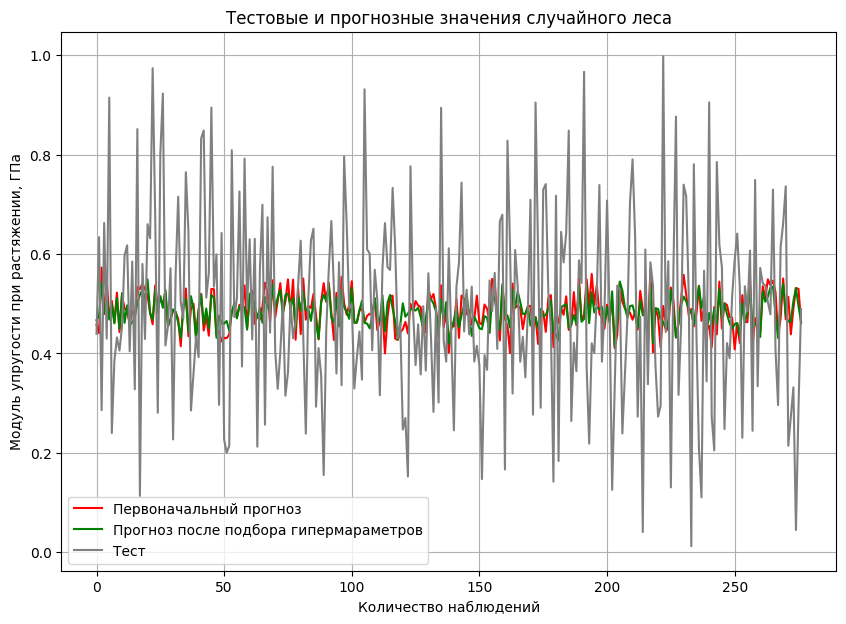

In [64]:
plt.figure(figsize = (10, 7))
plt.title("Тестовые и прогнозные значения случайного леса")
plt.plot(y_pred_rf_upr, label = "Первоначальный прогноз", color = "red")
plt.plot(y_pred_rf_upr_hyp, label = "Прогноз после подбора гипермараметров", color = "green")
plt.plot(y_norm_test_upr.values, label = "Тест", color = "grey")
plt.xlabel("Количество наблюдений")
plt.ylabel("Модуль упругости при растяжении, ГПа")
plt.legend()
plt.grid(True)

##### Прочность при растяжении, МПа

In [65]:
rf_pr = RandomForestRegressor(min_samples_split=10, max_features='sqrt', random_state=3)
rf_pr.fit(X_norm_train_pr, y_norm_train_pr) #обучаем модель
y_pred_rf_pr = rf_pr.predict(X_norm_test_pr)
print('Результаты обучения случайного леса "Прочность при растяжении, МПа":') 
print_metrics(y_norm_test_pr, y_pred_rf_pr)

Результаты обучения случайного леса "Прочность при растяжении, МПа":
Среднеквадратическая ошибка MSE: 0.035
Средняя абсолютная ошибка MAE: 0.151
Корень из среднеквадратической ошибки RMSE: 0.186
Коэффициент детерминации R2: 0.003
Точность модели (%) 70.693


In [66]:
model_rf=RandomForestRegressor()
params_rf_pr = {"min_samples_split": [2, 5, 9, 10, 20, 30, 40, 50, 60, 70], "max_features": ['sqrt', 'n/3'], "random_state": [3]}

Search_Model_Param(model_rf, params_rf_pr, X_norm_train_pr, y_norm_train_pr)

Fitting 3 folds for each of 20 candidates, totalling 60 fits
Лучшие гиперпараметры: {'max_features': 'sqrt', 'min_samples_split': 50, 'random_state': 3}
Модель с оптимальными гипермараметрами: RandomForestRegressor(max_features='sqrt', min_samples_split=50, random_state=3)


In [67]:
rf_pr_hyp = RandomForestRegressor(min_samples_split=50, max_features='sqrt', random_state=3)
rf_pr_hyp.fit(X_norm_train_pr, y_norm_train_pr) #обучаем модель
y_pred_rf_pr_hyp = rf_pr_hyp.predict(X_norm_test_pr)
print('Результаты обучения случайного леса "Прочность при растяжении, МПа":') 
print_metrics(y_norm_test_pr, y_pred_rf_pr_hyp)

Результаты обучения случайного леса "Прочность при растяжении, МПа":
Среднеквадратическая ошибка MSE: 0.035
Средняя абсолютная ошибка MAE: 0.149
Корень из среднеквадратической ошибки RMSE: 0.186
Коэффициент детерминации R2: 0.008
Точность модели (%) 70.934


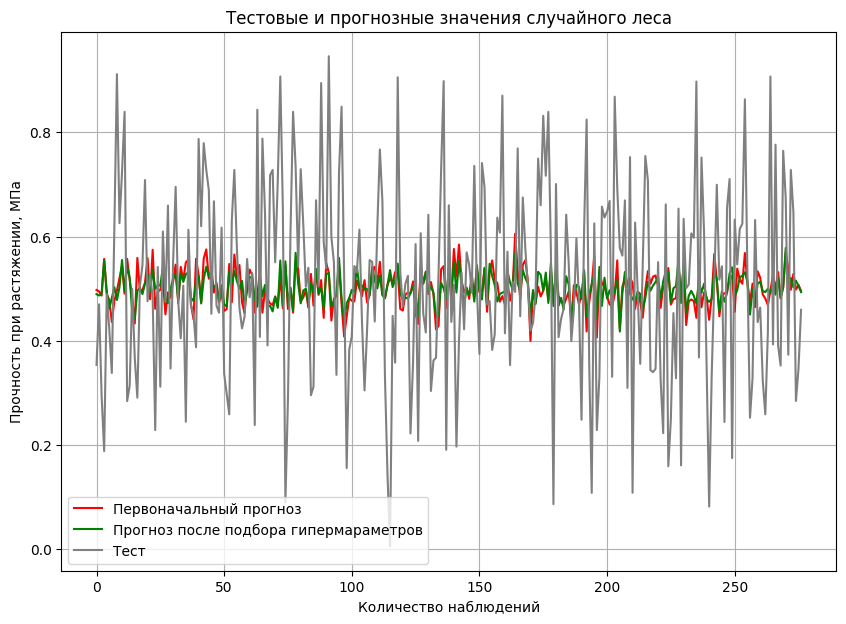

In [68]:
plt.figure(figsize = (10, 7))
plt.title("Тестовые и прогнозные значения случайного леса")
plt.plot(y_pred_rf_pr, label = "Первоначальный прогноз", color = "red")
plt.plot(y_pred_rf_pr_hyp, label = "Прогноз после подбора гипермараметров", color = "green")
plt.plot(y_norm_test_pr.values, label = "Тест", color = "grey")
plt.xlabel("Количество наблюдений")
plt.ylabel("Прочность при растяжении, МПа")
plt.legend()
plt.grid(True)

#### Градиентный бустинг

##### Модуль упругости при растяжении, ГПа

In [69]:
gbr_upr = GradientBoostingRegressor(n_estimators=40, learning_rate=0.1, random_state=3)
gbr_upr.fit(X_norm_train_upr, y_norm_train_upr) #обучаем модель
y_pred_gbr_upr = gbr_upr.predict(X_norm_test_upr)
print('Результаты обучения методом градиентного бустинга для величины "Модуль упругости при растяжении, ГПа":') 
print_metrics(y_norm_test_upr, y_pred_gbr_upr)

Результаты обучения методом градиентного бустинга для величины "Модуль упругости при растяжении, ГПа":
Среднеквадратическая ошибка MSE: 0.039
Средняя абсолютная ошибка MAE: 0.156
Корень из среднеквадратической ошибки RMSE: 0.196
Коэффициент детерминации R2: -0.041
Точность модели (%) 68.463


In [70]:
model_gbr=GradientBoostingRegressor()
params_gbr_upr = {"n_estimators": [10, 20, 30, 40, 50, 100, 200], "learning_rate": [0.01, 0.1, 0.2, 0.5], "max_depth": [3, 6, 10], 'random_state':[3]}
Search_Model_Param(model_gbr, params_gbr_upr, X_norm_train_upr, y_norm_train_upr)

Fitting 3 folds for each of 84 candidates, totalling 252 fits
Лучшие гиперпараметры: {'learning_rate': 0.01, 'max_depth': 3, 'n_estimators': 10, 'random_state': 3}
Модель с оптимальными гипермараметрами: GradientBoostingRegressor(learning_rate=0.01, n_estimators=10, random_state=3)


In [71]:
gbr_upr_hyp = GradientBoostingRegressor(n_estimators=10, max_depth=3, learning_rate=0.01, random_state=3)
gbr_upr_hyp.fit(X_norm_train_upr, y_norm_train_upr) #обучаем модель
y_pred_gbr_upr_hyp = gbr_upr_hyp.predict(X_norm_test_upr)
print('Результаты обучения методом градиентного бустинга для величины "Модуль упругости при растяжении, ГПа":') 
print_metrics(y_norm_test_upr, y_pred_gbr_upr_hyp)

Результаты обучения методом градиентного бустинга для величины "Модуль упругости при растяжении, ГПа":
Среднеквадратическая ошибка MSE: 0.037
Средняя абсолютная ошибка MAE: 0.154
Корень из среднеквадратической ошибки RMSE: 0.193
Коэффициент детерминации R2: -0.004
Точность модели (%) 68.765


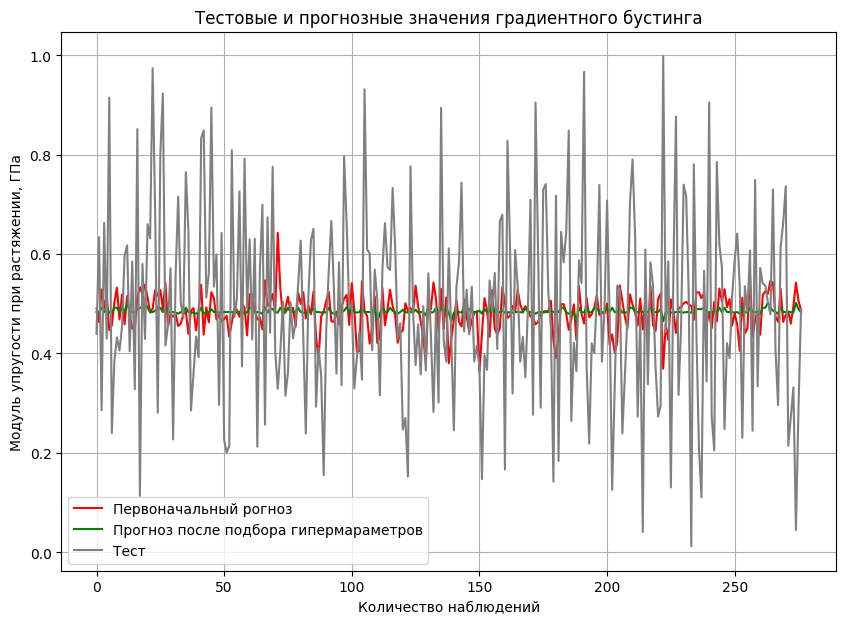

In [72]:
plt.figure(figsize = (10, 7))
plt.title("Тестовые и прогнозные значения градиентного бустинга")
plt.plot(y_pred_gbr_upr, label = "Первоначальный рогноз", color = "red")
plt.plot(y_pred_gbr_upr_hyp, label = "Прогноз после подбора гипермараметров", color = "green")
plt.plot(y_norm_test_upr.values, label = "Тест", color = "grey")
plt.xlabel("Количество наблюдений")
plt.ylabel("Модуль упругости при растяжении, ГПа")
plt.legend()
plt.grid(True)

##### Прочность при растяжении, МПа

In [73]:
gbr_pr = GradientBoostingRegressor(n_estimators=50, learning_rate=0.1, random_state=3)
gbr_pr.fit(X_norm_train_pr, y_norm_train_pr) #обучаем модель
y_pred_gbr_pr = gbr_pr.predict(X_norm_test_pr)
print('Результаты обучения случайного леса "Прочность при растяжении, МПа":') 
print_metrics(y_norm_test_pr, y_pred_gbr_pr)

Результаты обучения случайного леса "Прочность при растяжении, МПа":
Среднеквадратическая ошибка MSE: 0.037
Средняя абсолютная ошибка MAE: 0.156
Корень из среднеквадратической ошибки RMSE: 0.191
Коэффициент детерминации R2: -0.048
Точность модели (%) 69.753


In [74]:
model_gbr=GradientBoostingRegressor()
params_gbr_pr = {"n_estimators": [10, 20, 30, 40, 50, 100, 200], "learning_rate": [0.01, 0.1, 0.2, 0.5], "max_depth": [3, 6, 10], 'random_state':[3]}
Search_Model_Param(model_gbr, params_gbr_pr, X_norm_train_pr, y_norm_train_pr)

Fitting 3 folds for each of 84 candidates, totalling 252 fits
Лучшие гиперпараметры: {'learning_rate': 0.01, 'max_depth': 10, 'n_estimators': 10, 'random_state': 3}
Модель с оптимальными гипермараметрами: GradientBoostingRegressor(learning_rate=0.01, max_depth=10, n_estimators=10,
                          random_state=3)


In [75]:
gbr_pr_hyp = GradientBoostingRegressor(n_estimators=10, learning_rate=0.01, max_depth=10, random_state=3)
gbr_pr_hyp.fit(X_norm_train_pr, y_norm_train_pr) #обучаем модель
y_pred_gbr_pr_hyp = gbr_pr_hyp.predict(X_norm_test_pr)
print('Результаты обучения случайного леса "Прочность при растяжении, МПа":') 
print_metrics(y_norm_test_pr, y_pred_gbr_pr_hyp)

Результаты обучения случайного леса "Прочность при растяжении, МПа":
Среднеквадратическая ошибка MSE: 0.035
Средняя абсолютная ошибка MAE: 0.152
Корень из среднеквадратической ошибки RMSE: 0.188
Коэффициент детерминации R2: -0.013
Точность модели (%) 70.446


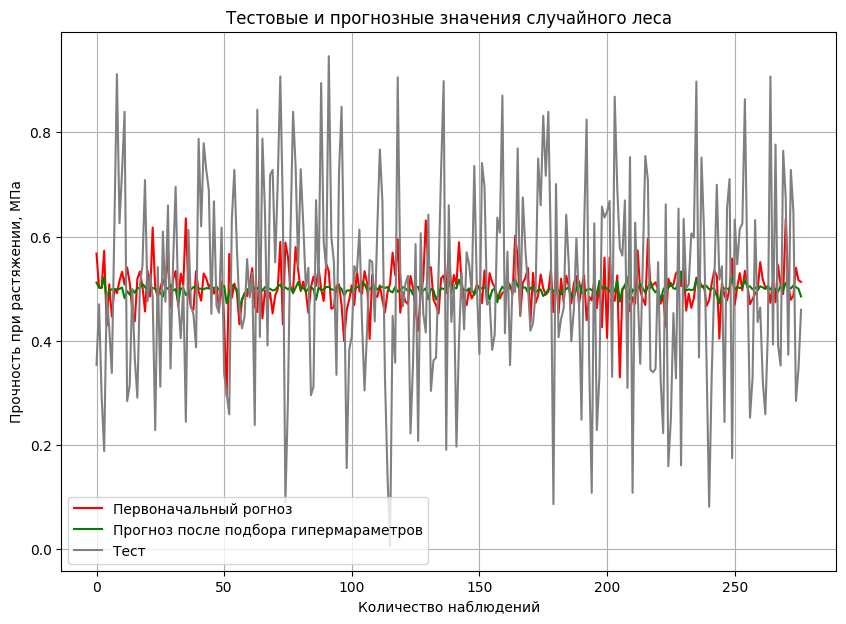

In [76]:
plt.figure(figsize = (10, 7))
plt.title("Тестовые и прогнозные значения случайного леса")
plt.plot(y_pred_gbr_pr, label = "Первоначальный рогноз", color = "red")
plt.plot(y_pred_gbr_pr_hyp, label = "Прогноз после подбора гипермараметров", color = "green")
plt.plot(y_norm_test_pr.values, label = "Тест", color = "grey")
plt.xlabel("Количество наблюдений")
plt.ylabel("Прочность при растяжении, МПа")
plt.legend()
plt.grid(True)

#### Сравнение результатов

##### Модуль упругости при растяжении

In [77]:
results_df_upr = pd.DataFrame({
    'Модель': ['Метод опорных векторов','Линейная регрессия', 'Метод K-ближайших соседей', 'Случайный лес', 'Градиентный бустинг'],
    'MSE': [None, None, None, None, None],
    'RMSE': [None, None, None, None, None],
    'MAE': [None, None, None, None, None],
    'R2': [None, None, None, None, None]
})

results_df_upr['MSE'] = [
    np.round(mean_squared_error(y_std_test_upr, y_pred_svr_upr_hyp), 3),
    np.round(mean_squared_error(y_norm_test_upr, y_pred_lr_upr), 3),
    np.round(mean_squared_error(y_norm_test_upr, y_pred_knr_upr_hyp), 3),
    np.round(mean_squared_error(y_norm_test_upr, y_pred_rf_upr_hyp), 3),
    np.round(mean_squared_error(y_norm_test_upr, y_pred_gbr_upr_hyp), 3)
]
results_df_upr['RMSE'] = [
    np.round(np.sqrt(mean_squared_error(y_std_test_upr, y_pred_svr_upr_hyp)), 3),
    np.round(np.sqrt(mean_squared_error(y_norm_test_upr, y_pred_lr_upr)), 3),
    np.round(np.sqrt(mean_squared_error(y_norm_test_upr, y_pred_knr_upr_hyp)), 3),
    np.round(np.sqrt(mean_squared_error(y_norm_test_upr, y_pred_rf_upr_hyp)), 3),
    np.round(np.sqrt(mean_squared_error(y_norm_test_upr, y_pred_gbr_upr_hyp)), 3)
]
results_df_upr['MAE'] = [
    np.round(mean_absolute_error(y_std_test_upr, y_pred_svr_upr_hyp), 3),
    np.round(mean_absolute_error(y_norm_test_upr, y_pred_lr_upr), 3),
    np.round(mean_absolute_error(y_norm_test_upr, y_pred_knr_upr_hyp), 3),
    np.round(mean_absolute_error(y_norm_test_upr, y_pred_rf_upr_hyp), 3),
    np.round(mean_absolute_error(y_norm_test_upr, y_pred_gbr_upr_hyp), 3)
]

results_df_upr['R2'] = [
    np.round(r2_score(y_std_test_upr, y_pred_svr_upr_hyp), 3),
    np.round(r2_score(y_norm_test_upr, y_pred_lr_upr), 3),
    np.round(r2_score(y_norm_test_upr, y_pred_knr_upr_hyp), 3),
    np.round( r2_score(y_norm_test_upr, y_pred_rf_upr_hyp), 3),
    np.round(r2_score(y_norm_test_upr, y_pred_gbr_upr_hyp), 3)    
]
table_upr = tabulate(results_df_upr, headers='keys', tablefmt='fancy_grid')
# Вывод результатов в виде таблицы
print(table_upr)

╒════╤═══════════════════════════╤═══════╤════════╤═══════╤════════╕
│    │ Модель                    │   MSE │   RMSE │   MAE │     R2 │
╞════╪═══════════════════════════╪═══════╪════════╪═══════╪════════╡
│  0 │ Метод опорных векторов    │ 0.969 │  0.985 │ 0.792 │ -0.009 │
├────┼───────────────────────────┼───────┼────────┼───────┼────────┤
│  1 │ Линейная регрессия        │ 0.038 │  0.194 │ 0.156 │ -0.016 │
├────┼───────────────────────────┼───────┼────────┼───────┼────────┤
│  2 │ Метод K-ближайших соседей │ 0.037 │  0.192 │ 0.154 │  0.002 │
├────┼───────────────────────────┼───────┼────────┼───────┼────────┤
│  3 │ Случайный лес             │ 0.038 │  0.195 │ 0.155 │ -0.025 │
├────┼───────────────────────────┼───────┼────────┼───────┼────────┤
│  4 │ Градиентный бустинг       │ 0.037 │  0.193 │ 0.154 │ -0.004 │
╘════╧═══════════════════════════╧═══════╧════════╧═══════╧════════╛


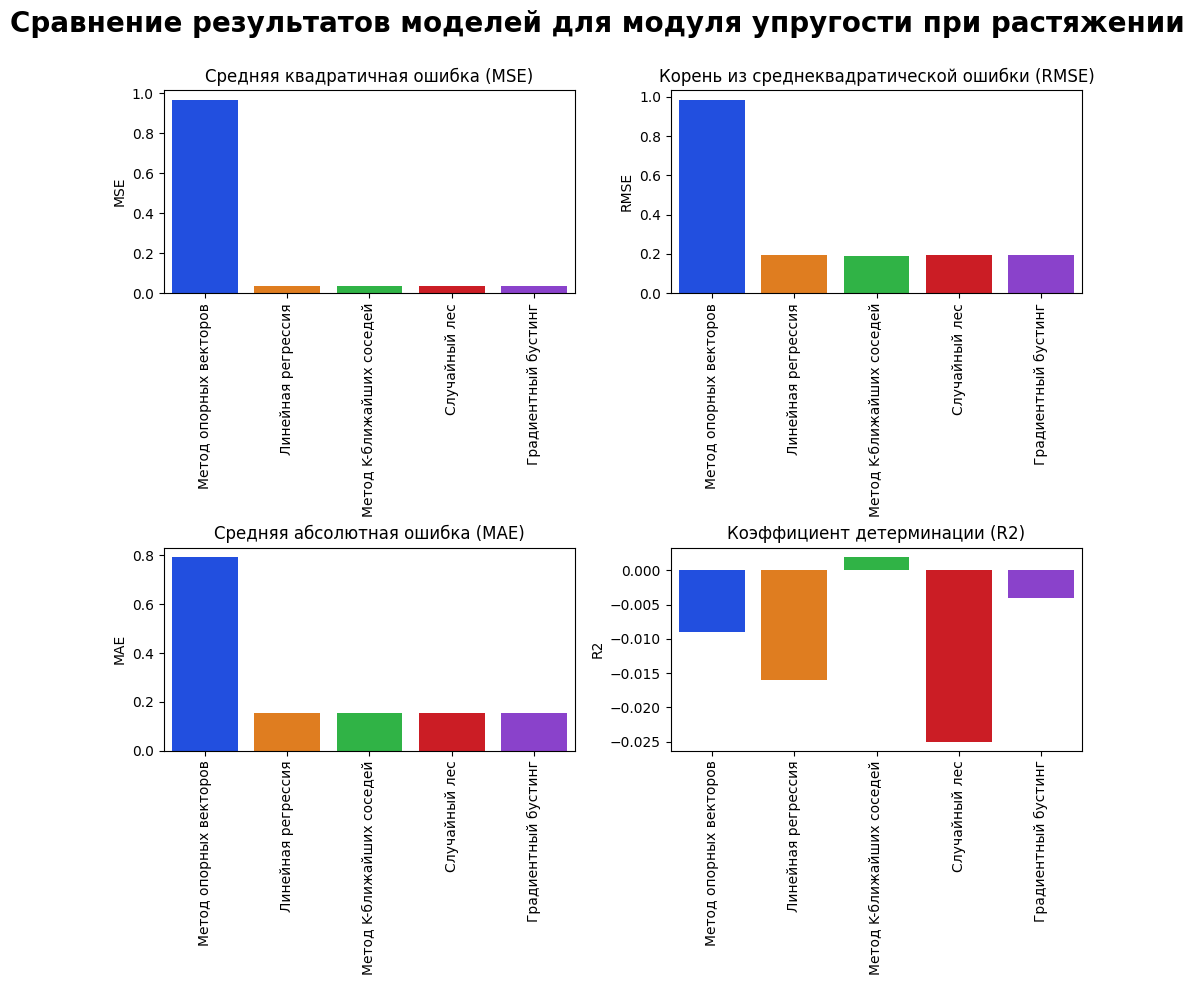

In [78]:
#  Визуализируем результат
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(10, 10))

# График MSE
sns.barplot(x='Модель', y='MSE', data=results_df_upr, ax=axes[0,0], palette='bright')
axes[0,0].set_title('Средняя квадратичная ошибка (MSE)')
axes[0,0].set_xlabel('')
axes[0,0].set_ylabel('MSE')
axes[0,0].tick_params(axis='x', rotation=90)

# График RMSE
sns.barplot(x='Модель', y='RMSE', data=results_df_upr, ax=axes[0,1], palette='bright')
axes[0,1].set_title('Корень из среднеквадратической ошибки (RMSE)')
axes[0,1].set_xlabel('')
axes[0,1].set_ylabel('RMSE')
axes[0,1].tick_params(axis='x', rotation=90)

# График MAE
sns.barplot(x='Модель', y='MAE', data=results_df_upr, ax=axes[1,0], palette='bright')
axes[1,0].set_title('Средняя абсолютная ошибка (MAE)')
axes[1,0].set_xlabel('')
axes[1,0].set_ylabel('MAE')
axes[1,0].tick_params(axis='x', rotation=90)

# График R^2
sns.barplot(x='Модель', y='R2', data=results_df_upr, ax=axes[1,1], palette='bright')
axes[1,1].set_title('Коэффициент детерминации (R2)')
axes[1,1].set_xlabel('')
axes[1,1].set_ylabel('R2')
axes[1,1].tick_params(axis='x', rotation=90)

fig.suptitle('Сравнение результатов моделей для модуля упругости при растяжении', fontsize=20, fontweight='bold')
plt.tight_layout()
plt.subplots_adjust(top=0.9)
plt.show()


##### Прочность при растяжении

In [79]:
results_df_pr = pd.DataFrame({
    'Модель': ['Метод опорных векторов','Линейная регрессия', 'Метод K-ближайших соседей', 'Случайный лес', 'Градиентный бустинг'],
    'MSE': [None, None, None, None, None],
    'RMSE': [None, None, None, None, None],
    'MAE': [None, None, None, None, None],
    'R2': [None, None, None, None, None]
})

results_df_pr['MSE'] = [
    np.round(mean_squared_error(y_std_test_pr, y_pred_svr_pr_hyp), 3),
    np.round(mean_squared_error(y_norm_test_pr, y_pred_lr_pr), 3),
    np.round(mean_squared_error(y_norm_test_pr, y_pred_knr_pr_hyp), 3),
    np.round(mean_squared_error(y_norm_test_pr, y_pred_rf_pr_hyp), 3),
    np.round(mean_squared_error(y_norm_test_pr, y_pred_gbr_pr_hyp), 3)
]
results_df_pr['RMSE'] = [
    np.round(np.sqrt(mean_squared_error(y_std_test_pr, y_pred_svr_pr_hyp)), 3),
    np.round(np.sqrt(mean_squared_error(y_norm_test_pr, y_pred_lr_pr)), 3),
    np.round(np.sqrt(mean_squared_error(y_norm_test_pr, y_pred_knr_pr_hyp)), 3),
    np.round(np.sqrt(mean_squared_error(y_norm_test_pr, y_pred_rf_pr_hyp)), 3),
    np.round(np.sqrt(mean_squared_error(y_norm_test_pr, y_pred_gbr_pr_hyp)), 3)
]
results_df_pr['MAE'] = [
    np.round(mean_absolute_error(y_std_test_pr, y_pred_svr_pr_hyp), 3),
    np.round(mean_absolute_error(y_norm_test_pr, y_pred_lr_pr), 3),
    np.round(mean_absolute_error(y_norm_test_pr, y_pred_knr_pr_hyp), 3),
    np.round(mean_absolute_error(y_norm_test_pr, y_pred_rf_pr_hyp), 3),
    np.round(mean_absolute_error(y_norm_test_pr, y_pred_gbr_pr_hyp), 3)
]

results_df_pr['R2'] = [
    np.round(r2_score(y_std_test_pr, y_pred_svr_pr_hyp),3),
    np.round(r2_score(y_norm_test_pr, y_pred_lr_pr),3),
    np.round(r2_score(y_norm_test_pr, y_pred_knr_pr_hyp),3),
    np.round(r2_score(y_norm_test_pr, y_pred_rf_pr_hyp),3),
    np.round(r2_score(y_norm_test_pr, y_pred_gbr_pr_hyp),3)    
]
table_pr = tabulate(results_df_pr, headers='keys', tablefmt='fancy_grid')
# Вывод результатов в виде таблицы
print(table_pr)

╒════╤═══════════════════════════╤═══════╤════════╤═══════╤════════╕
│    │ Модель                    │   MSE │   RMSE │   MAE │     R2 │
╞════╪═══════════════════════════╪═══════╪════════╪═══════╪════════╡
│  0 │ Метод опорных векторов    │ 0.981 │  0.99  │ 0.799 │ -0.001 │
├────┼───────────────────────────┼───────┼────────┼───────┼────────┤
│  1 │ Линейная регрессия        │ 0.035 │  0.186 │ 0.15  │  0.009 │
├────┼───────────────────────────┼───────┼────────┼───────┼────────┤
│  2 │ Метод K-ближайших соседей │ 0.035 │  0.188 │ 0.152 │ -0.01  │
├────┼───────────────────────────┼───────┼────────┼───────┼────────┤
│  3 │ Случайный лес             │ 0.035 │  0.186 │ 0.149 │  0.008 │
├────┼───────────────────────────┼───────┼────────┼───────┼────────┤
│  4 │ Градиентный бустинг       │ 0.035 │  0.188 │ 0.152 │ -0.013 │
╘════╧═══════════════════════════╧═══════╧════════╧═══════╧════════╛


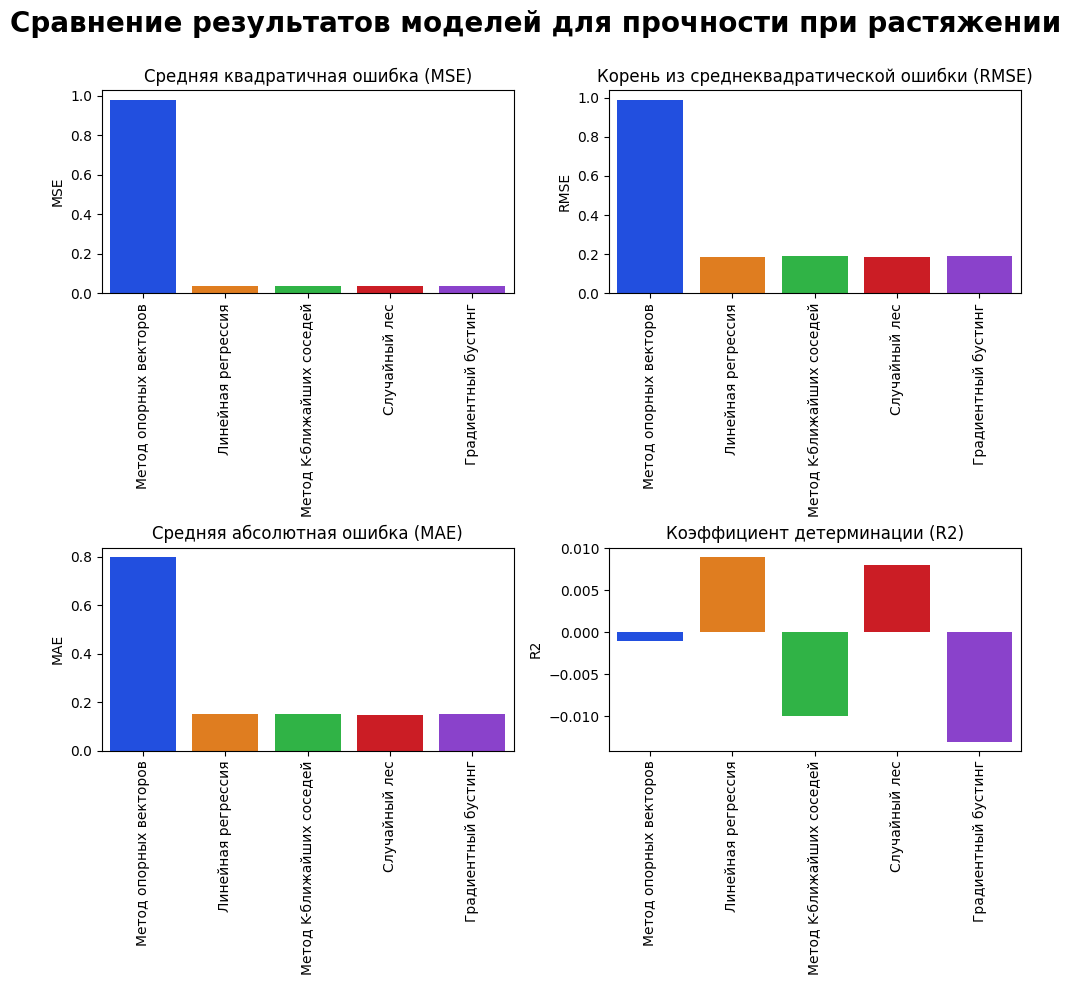

In [80]:
#  Визуализируем результат
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(10, 10))

# График MSE
sns.barplot(x='Модель', y='MSE', data=results_df_pr, ax=axes[0,0], palette='bright')
axes[0,0].set_title('Средняя квадратичная ошибка (MSE)')
axes[0,0].set_xlabel('')
axes[0,0].set_ylabel('MSE')
axes[0,0].tick_params(axis='x', rotation=90)

# График RMSE
sns.barplot(x='Модель', y='RMSE', data=results_df_pr, ax=axes[0,1], palette='bright')
axes[0,1].set_title('Корень из среднеквадратической ошибки (RMSE)')
axes[0,1].set_xlabel('')
axes[0,1].set_ylabel('RMSE')
axes[0,1].tick_params(axis='x', rotation=90)

# График MAE
sns.barplot(x='Модель', y='MAE', data=results_df_pr, ax=axes[1,0], palette='bright')
axes[1,0].set_title('Средняя абсолютная ошибка (MAE)')
axes[1,0].set_xlabel('')
axes[1,0].set_ylabel('MAE')
axes[1,0].tick_params(axis='x', rotation=90)

# График R^2
sns.barplot(x='Модель', y='R2', data=results_df_pr, ax=axes[1,1], palette='bright')
axes[1,1].set_title('Коэффициент детерминации (R2)')
axes[1,1].set_xlabel('')
axes[1,1].set_ylabel('R2')
axes[1,1].tick_params(axis='x', rotation=90)

fig.suptitle('Сравнение результатов моделей для прочности при растяжении', fontsize=20, fontweight='bold')
plt.tight_layout()
plt.subplots_adjust(top=0.9)
plt.show()


#### Нейронная сеть

In [81]:
X_ns = df_norm.drop(['Соотношение матрица-наполнитель'], axis=1)
#Целевые признаки
y_ns = df_norm[['Соотношение матрица-наполнитель']]
#Делим данные на обучающую и тестовую выборку в соотношении 70% и 30% соответственно
X_train_ns, X_test_ns, y_train_ns, y_test_ns = train_test_split(X_ns, y_ns, test_size=0.3, random_state=1)

In [82]:
X_train_ns.shape

(645, 12)

In [83]:
def base_model():
    model = Sequential()
    model.add(Dense(8, input_dim=12, activation='tanh')) # скрытый полносвязный слой 1 input_dim=12
    model.add(Dense(8, activation='tanh')) # скрытый полносвязный слой 2
    model.add(Dropout(0.5))
    model.add(Dense(1, activation='linear')) # выходной слой
   
    model.compile(loss='mean_squared_error', optimizer='sgd')
    return model

#Создаем НС и обучаем её
ns = base_model()
history = ns.fit(X_train_ns, y_train_ns, 
                    epochs=400,
                    verbose=0, validation_data=(X_test_ns, y_test_ns)) 

#Предсказываем значения
y_pred_ns = ns.predict(X_test_ns)

#Печатаем метрики и график
print_metrics(y_test_ns, y_pred_ns)

9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step 
Среднеквадратическая ошибка MSE: 0.037
Средняя абсолютная ошибка MAE: 0.156
Корень из среднеквадратической ошибки RMSE: 0.192
Коэффициент детерминации R2: 0.003
Точность модели (%) 68.753


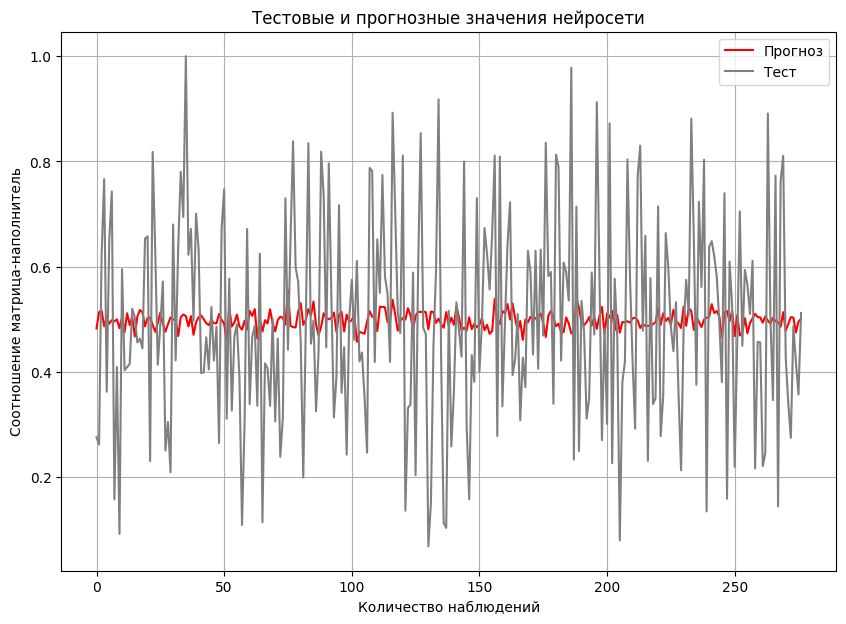

In [112]:
plt.figure(figsize = (10, 7))
plt.title("Тестовые и прогнозные значения нейросети")
plt.plot(y_pred_ns, label = "Прогноз", color = "red")
plt.plot(y_test_ns.values, label = "Тест", color = "grey")
plt.xlabel("Количество наблюдений")
plt.ylabel("Соотношение матрица-наполнитель")
plt.legend()
plt.grid(True)

In [105]:
minmax_scl_x = MinMaxScaler()
minmax_scl_y = MinMaxScaler()  
X = df_no_outliers.drop(['Соотношение матрица-наполнитель'], axis = 1)
y = df_no_outliers[['Соотношение матрица-наполнитель']]
minmax_scl_x.fit(X.values)
minmax_scl_y.fit(y.values)
dump(minmax_scl_x, '../model_dir/minmax_scl_x.pkl')
dump(minmax_scl_y, '../model_dir/minmax_scl_y.pkl')

['../model_dir/minmax_scl_y.pkl']

In [97]:
os.makedirs('../model_dir', exist_ok=True)

In [102]:
model_path = os.path.join('../model_dir', "my_model.keras")
ns.save(model_path)

### Консольное приложение

In [84]:
# Создадим функцию для ввода данных
def input_variable():
    x1 = float(input('Плотность, кг/м3: '))
    x2 = float(input('Модуль упругости, ГПа: '))
    x3 = float(input('Количество отвердителя, м.%: '))
    x4 = float(input('Содержание эпоксидных групп,%_2: '))
    x5 = float(input('Температура вспышки, С_2: '))
    x6 = float(input('Поверхностная плотность, г/м2: '))
    x7 = float(input('Модуль упругости при растяжении, ГПа: '))
    x8 = float(input('Прочность при растяжении, МПа: '))
    x9 = float(input('Потребление смолы, г/м2: '))
    x10 = float(input('Угол нашивки: '))
    x11 = float(input('Шаг нашивки: '))
    x12 = float(input('Плотность нашивки: '))
    return x1, x2, x3, x4, x5, x6, x7, x8, x9, x10, x11, x12

In [108]:
# Создадим функцию для вызова приложения
def app_model():
    # Загружаем модель и масштабаторы
    nn_model = load_model('../model_dir/my_model.keras')
    scaler_x = load('../model_dir/minmax_scl_x.pkl')
    scaler_y = load('../model_dir/minmax_scl_y.pkl')
   
    print('Приложение прогнозирует соотношение "матрица-наполнитель"')
    for i in range(110):
        try:
            print('Введите "1" для прогноза, "2" для выхода')
            check = input()
      
            if check == '1':
                print('Введите данные для прогноза')
                X = input_variable()
                X =  scaler_x.transform(np.array(X).reshape(1,-1))
                prediction = nn_model.predict(X)
                output = scaler_y.inverse_transform(prediction) 
                print('Прогнозное значение соотношения "матрица-наполнитель": ')
                print(output[0][0])

            elif check == '2':
                break
            else:
                print('Повторите выбор')
                
        except Exception as e:
            print(e)
            print('Введены некорректные данные. Пожалуйста, повторите операцию')
app_model()            

Приложение прогнозирует соотношение "матрица-наполнитель"
Введите "1" для прогноза, "2" для выхода
Введите данные для прогноза
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 187ms/step
Прогнозное значение соотношения "матрица-наполнитель": 
2.962577
Введите "1" для прогноза, "2" для выхода
